# Exploratory Data Analyst

## Importing Required Libraries and Data

### Importing Required Libraries

In [2]:
# import library used for data processing
import pandas as pd
pd.set_option('display.max_columns', None) # to remove the limit of columns shows as output
import numpy as np
import datetime as dt
import copy
from IPython.display import display

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [3]:
# customer data
dim_customers = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/dim_customers.csv", encoding='ISO-8859-1')
# product data
dim_products = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/dim_products.csv", encoding='ISO-8859-1')
# gross price data
fact_gross_price = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_gross_price.csv", encoding='ISO-8859-1')
# manufacturing cost data
fact_manufacturing_cost = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_manufacturing_cost.csv", encoding='ISO-8859-1')
# discount data
fact_pre_invoice_deduction = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_pre_invoice_deduction.csv", encoding='ISO-8859-1')
# sales data
fact_sales_monthly = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_sales_monthly.csv", encoding='ISO-8859-1')

## Exploratory Data

### I. Customer Exploration

In [4]:
# calculate total customer
total_customer = dim_customers['customer_code'].count()
# check data
print(f"total number of customers is {total_customer}")

total number of customers is 209


#### Number of Customer by Platform

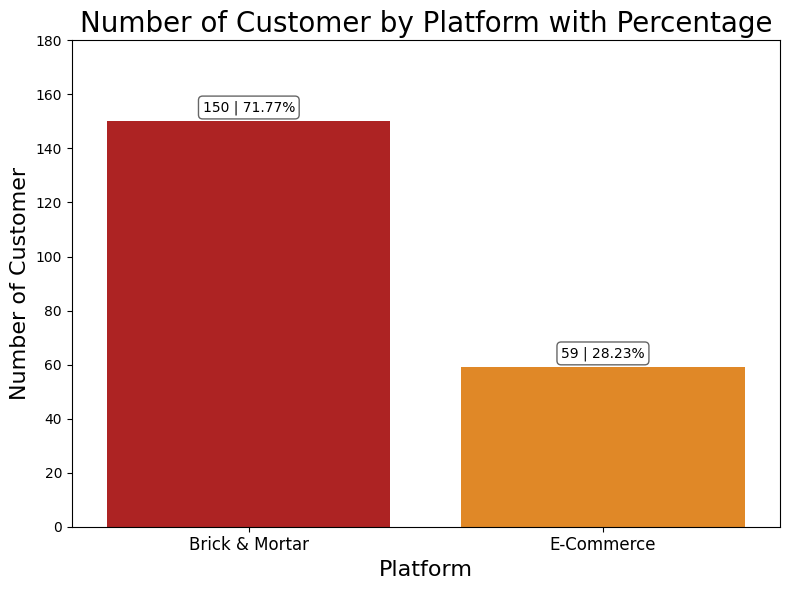

In [5]:
# filter number of customers by platform
customer_by_platform = dim_customers.groupby('platform').agg(number_of_customers=('customer_code','count')).reset_index()
# calculate the percentage of unique values in column
customer_by_platform['pct'] = round((customer_by_platform['number_of_customers'] / total_customer * 100), 2)
# define a custom color palette
custom_palette= {
    'Brick & Mortar': "#C40C0C", # dark red
    'E-Commerce': "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(8,6))
# plot the bar chart for the column
sns.barplot(data=customer_by_platform, x='platform', y='number_of_customers', hue='platform', palette=custom_palette)
# set title and axis labels
plt.title("Number of Customer by Platform with Percentage", fontsize=20)
plt.xlabel("Platform", fontsize=16)
plt.ylabel("Number of Customer", fontsize=16)
plt.xticks(fontsize=12)
plt.ylim(0, customer_by_platform['number_of_customers'].max()*1.2) # increase the y limit to have more space for annotation
# adding annotations
for index, row in customer_by_platform.iterrows():
    plt.annotate(f"{row['number_of_customers']} | {row['pct']}%",
                 xy=(row.name, row['number_of_customers']),
                 ha='center', va='center', fontsize=10,
                 xytext=(0,10),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)                 
                 )
# adjust layout
plt.tight_layout()
# show the plot
plt.show()

#### Number of Customer by Channel

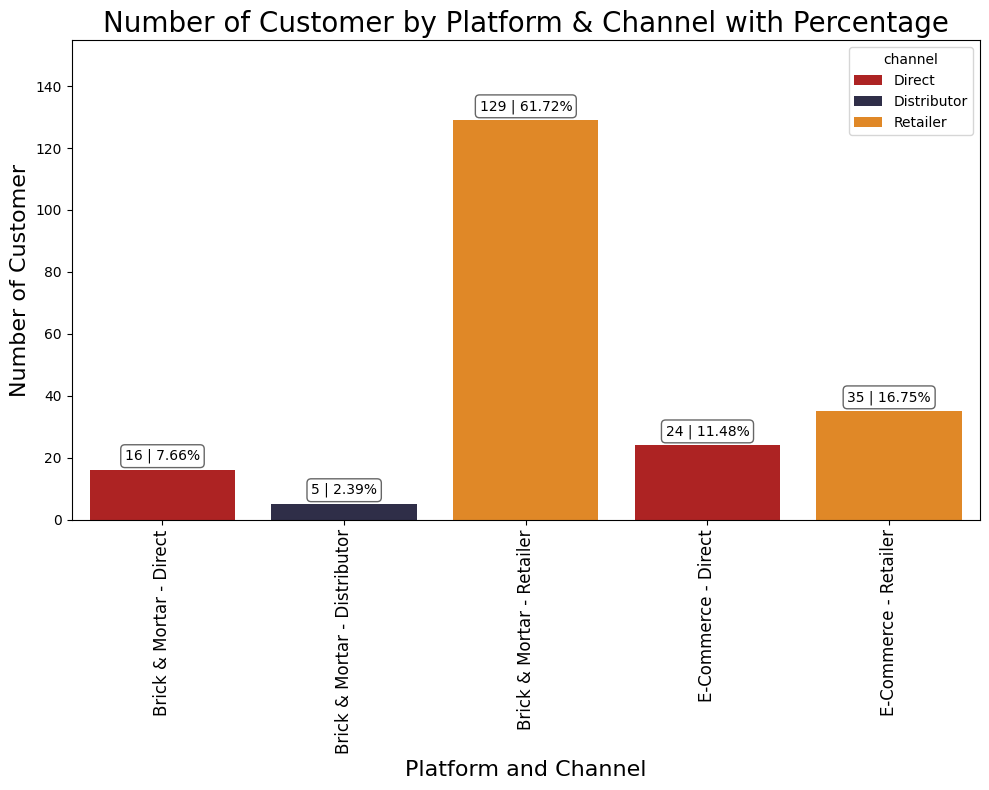

In [6]:
# filter number of customer by platform and channel
customer_by_channel = dim_customers.groupby(['platform','channel']).agg(number_of_customers=('customer_code','count')).reset_index()
# calculated the percentage of unique values in column
customer_by_channel['pct'] = round((customer_by_channel['number_of_customers'] / total_customer * 100), 2)
# create a new column to combine "platform" and "channel" columns
customer_by_channel['platform&channel'] = customer_by_channel['platform'] + " - " + customer_by_channel['channel']
# define a custom color palette
custom_palette= {
    'Direct': "#C40C0C", # dark red
    'Distributor': "#2B2A4C", # dark navy
    'Retailer': "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(10,8))
# plot the bar chart for the column
sns.barplot(data=customer_by_channel, x='platform&channel', y='number_of_customers', hue='channel', palette=custom_palette)
# set title and axis labels
plt.title("Number of Customer by Platform & Channel with Percentage", fontsize=20)
plt.xlabel("Platform and Channel", fontsize=16)
plt.ylabel("Number of Customer", fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.ylim(0, customer_by_channel['number_of_customers'].max()*1.2) # increase the y limit to have more space for annotation
# adding annotations
for index, row in customer_by_channel.iterrows():
    plt.annotate(f"{row['number_of_customers']} | {row['pct']}%",
                 xy=(row.name, row['number_of_customers']),
                 ha='center', va='center', fontsize=10,
                 xytext=(0,10),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)                 
                 )
# adjust layout
plt.tight_layout()
# show the plot
plt.show()

Mainly Retailer that have the percentage about 78.5%

Direct about 19.1%

and Distributor about 2.4%

#### Number of Customer by Region and Market
Provide the list of markets operate business

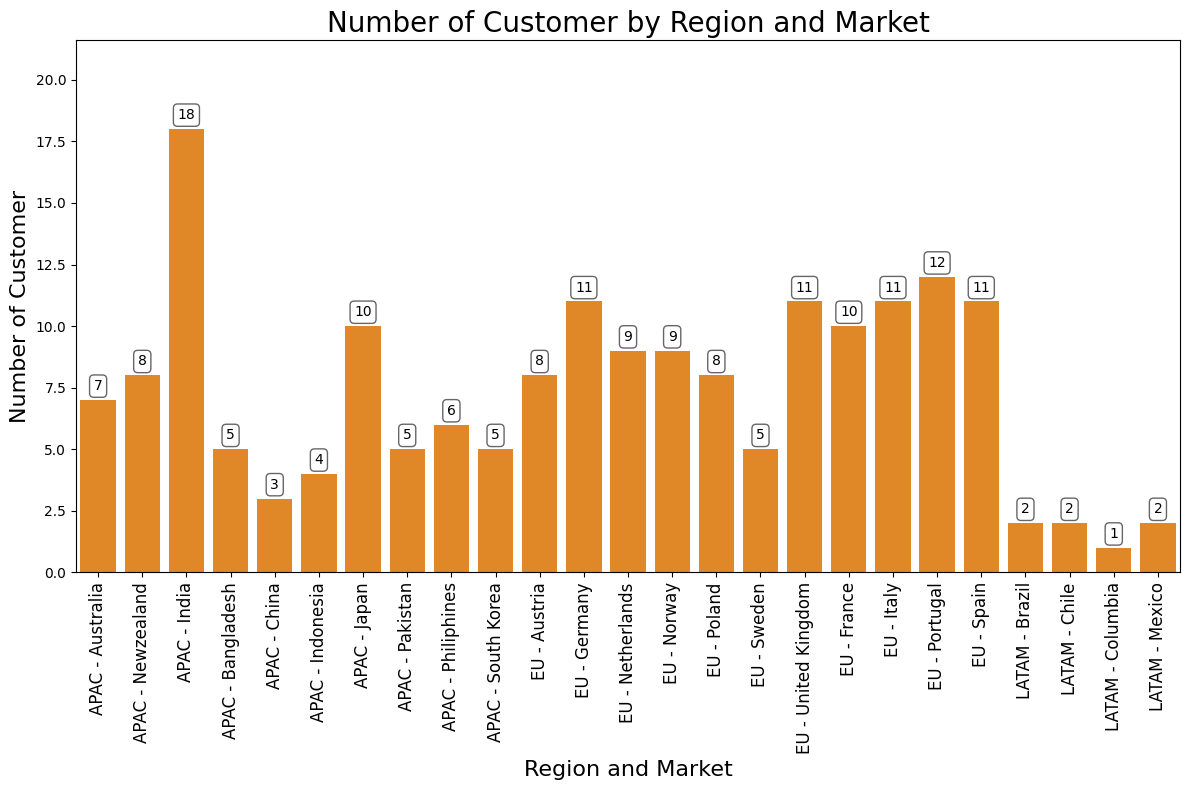

In [7]:
number_of_customer = dim_customers.groupby(['region','sub_zone','market']).agg(number_of_customer=('customer_code','count')).reset_index()
# create new column to combine "region" and "market" columns
number_of_customer['region_and_market'] = number_of_customer['region'] + " - " + number_of_customer['market']
# set the size of the figure
plt.figure(figsize=(12,8))
# plot the bar chart for the column
ax = sns.barplot(data=number_of_customer, x='region_and_market', y='number_of_customer', color='#FF8A08')
# set the title and axis labels
plt.title("Number of Customer by Region and Market", fontsize=20)
plt.xlabel("Region and Market", fontsize=16)
plt.ylabel("Number of Customer", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, number_of_customer['number_of_customer'].max()*1.2) # increase the y limit to have more space for annotations
# adding annotation
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() /2., p.get_height()),
                ha='center', va='center',
                xytext=(0,10),
                textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.6)
                )
# tight chart
plt.tight_layout()
# show the chart
plt.show()

### II. Discount and Discount Performance Analysis

#### Top Customer who received an average high pre_invoice_discount_pct

In [8]:
# Get customer information from 2 tables dim_customers and fact_pre_invoice_deduction
customer_with_discount = fact_pre_invoice_deduction.merge(dim_customers, how='left', on='customer_code', validate='many_to_one')
# top customer who received the high pre invoice discount percentage
top20_highest_discount_customer = customer_with_discount[
    (customer_with_discount['fiscal_year']==customer_with_discount['fiscal_year'].max())
                                                    ].sort_values(by='pre_invoice_discount_pct', ascending=False).reset_index(drop=True).head(20)
# check data after processing
top20_highest_discount_customer

,customer_code,fiscal_year,pre_invoice_discount_pct,customer,platform,channel,market,sub_zone,region
0,90001021,2021,0.3095,Taobao,E-Commerce,Retailer,China,ROA,APAC
1,90013122,2021,0.3093,Radio Popular,Brick & Mortar,Retailer,Italy,SE,EU
2,90020099,2021,0.3091,Integration Stores,Brick & Mortar,Retailer,Austria,NE,EU
3,80006155,2021,0.3091,Novus,Brick & Mortar,Distributor,Philiphines,ROA,APAC
4,90002009,2021,0.3083,Flipkart,E-Commerce,Retailer,India,India,APAC
5,90015148,2021,0.3076,Boulanger,Brick & Mortar,Retailer,Norway,NE,EU
6,90014141,2021,0.3074,Amazon,E-Commerce,Retailer,Netherlands,NE,EU
7,90008166,2021,0.3063,Sound,Brick & Mortar,Retailer,Australia,ANZ,APAC
8,90022080,2021,0.3059,Staples,Brick & Mortar,Retailer,USA,NaN,NaN
9,90012035,2021,0.3045,Notebillig,Brick & Mortar,Retailer,Germany,NE,EU


#### Top Customer who received an average high pre_invoice_discount_pct by Market

In [9]:
# get highest pre_invoice_discount_pct by market
highest_discount_by_market = customer_with_discount[customer_with_discount['fiscal_year']==customer_with_discount['fiscal_year'].max()].groupby(
    ['region','sub_zone','market','fiscal_year']).agg(pre_invoice_discount_pct=('pre_invoice_discount_pct','max')).reset_index()
# top 1 customer who received the highest pre_invoice_discount_pct by market
highest_discount_customer_by_market = highest_discount_by_market.merge(
    customer_with_discount,
    how='inner',
    on=highest_discount_by_market.columns.tolist(),
    validate='many_to_many'
    )
# check data after processing
highest_discount_customer_by_market

,region,sub_zone,market,fiscal_year,pre_invoice_discount_pct,customer_code,customer,platform,channel
0,APAC,ANZ,Australia,2021,0.3063,90008166,Sound,Brick & Mortar,Retailer
1,APAC,ANZ,Newzealand,2021,0.3015,90009131,Path,Brick & Mortar,Retailer
2,APAC,India,India,2021,0.3083,90002009,Flipkart,E-Commerce,Retailer
3,APAC,ROA,Bangladesh,2021,0.3034,90010046,Amazon,E-Commerce,Retailer
4,APAC,ROA,China,2021,0.3095,90001021,Taobao,E-Commerce,Retailer
5,APAC,ROA,Indonesia,2021,0.2455,90003179,Acclaimed Stores,Brick & Mortar,Retailer
6,APAC,ROA,Japan,2021,0.2967,90004065,Neptune,Brick & Mortar,Retailer
7,APAC,ROA,Pakistan,2021,0.2976,90005159,Expression,Brick & Mortar,Retailer
8,APAC,ROA,Philiphines,2021,0.3091,80006155,Novus,Brick & Mortar,Distributor
9,APAC,ROA,South Korea,2021,0.2819,80007196,Leader,Brick & Mortar,Distributor


#### Discount Types by customers
Phân tích:

Bạn có thể phân tích xem các nhóm khách hàng khác nhau nhận được mức chiết khấu trước hóa đơn như thế nào. Ví dụ, khách hàng từ nền tảng trực tuyến (platform) hoặc kênh bán hàng trực tiếp (channel) có nhận chiết khấu cao hơn không?

Phân tích này giúp công ty hiểu cách chính sách chiết khấu tác động đến các loại khách hàng khác nhau.

Kết quả mong muốn:

Hiểu rõ chiến lược chiết khấu hiện tại có hiệu quả với nhóm khách hàng nào nhất, từ đó tối ưu hóa chính sách chiết khấu.

### II. Product Exploration

#### Number of products over the years
What is the percentage of unique product increase for each year? columns: unique_products_2020, unique_products_2021, percentage_chg

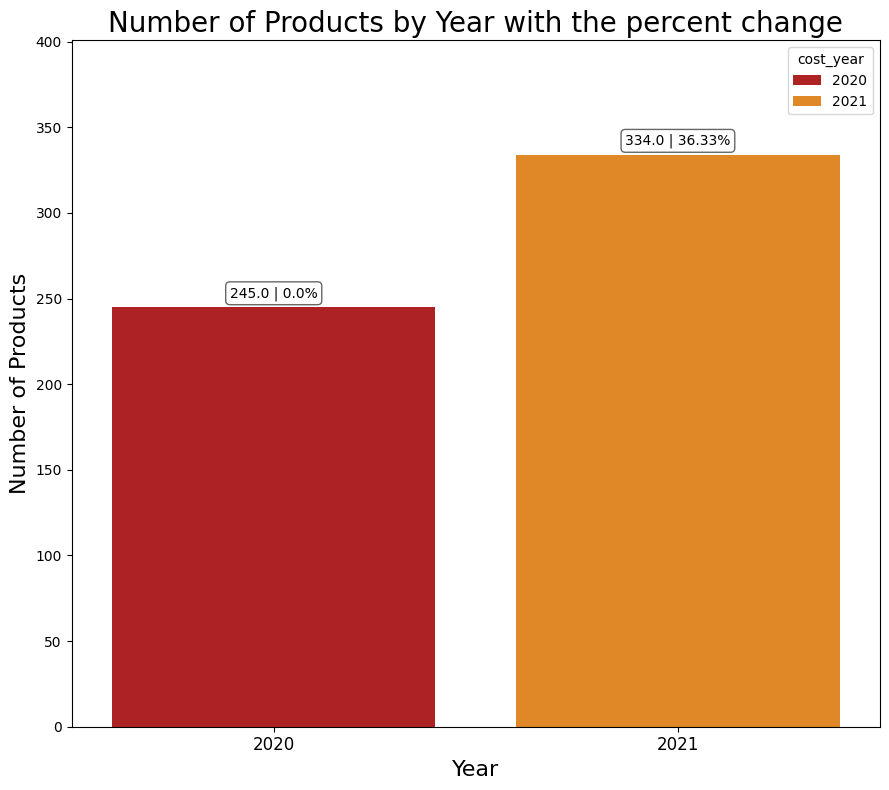

In [10]:
# the number of products by cost_year column
number_of_product = fact_manufacturing_cost.groupby(['cost_year']).agg(number_of_products=('product_code','count')).reset_index()
# calculate the percent change by cost_year
number_of_product['pct_change'] = round((number_of_product['number_of_products'] - number_of_product['number_of_products'].shift(1)) / number_of_product['number_of_products'].shift(1) * 100, 2)
# replace null values with 0 for plotting purpose
number_of_product['pct_change'].fillna(0, inplace=True)
# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(9,8))
# plot the bar chart for the column
sns.barplot(data=number_of_product, x='cost_year', y='number_of_products', hue='cost_year', palette=custom_palette)
# set title and axis labels
plt.title("Number of Products by Year with the percent change", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Products", fontsize=16)
plt.xticks(fontsize=12)
plt.ylim(0, number_of_product['number_of_products'].max()*1.2) # increase the y limit to have more space for annotation
# adding annotations
for index, row in number_of_product.iterrows():
    plt.annotate(f"{row['number_of_products']} | {row['pct_change']}%",
                 xy=(row.name, row['number_of_products']),
                 ha='center', va='center', fontsize=10,
                 xytext=(0,10),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)                 
                 )
# adjust layout
plt.tight_layout()
# show the plot
plt.show()

#### Number of Products by Division

##### Total Products by Division

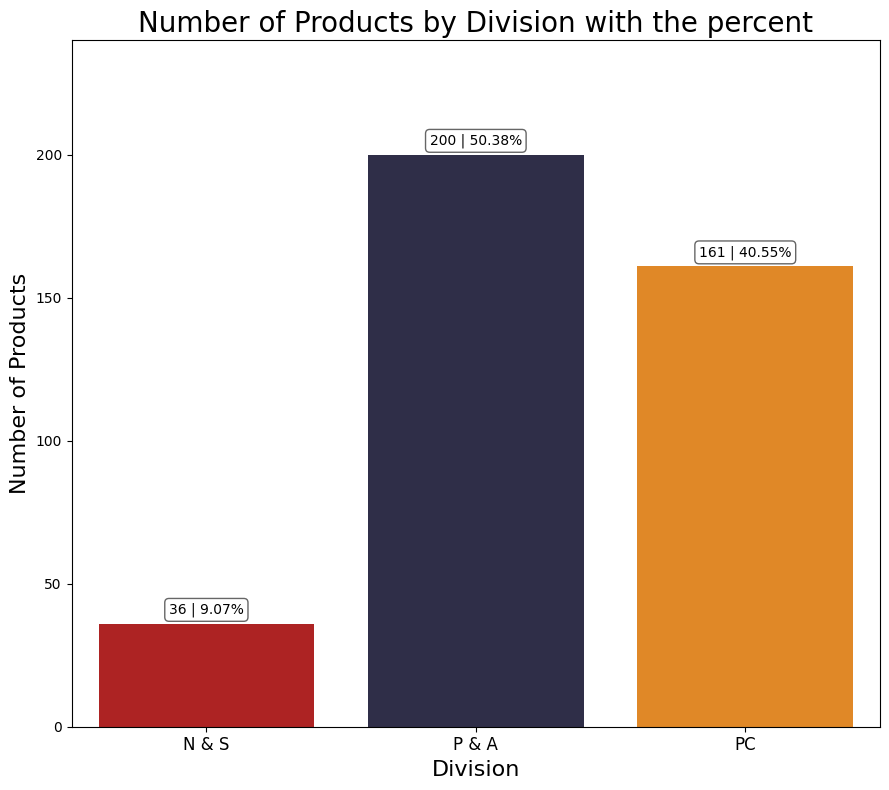

In [11]:
# filter number of products by division
total_product_by_division = dim_products.groupby(['division']).agg(number_of_products=('product_code','count')).reset_index()
total_product_by_division['pct'] = round((total_product_by_division['number_of_products']) / (dim_products['product_code'].count()) * 100, 2)
# define a custom color palette
custom_palette= {
    "N & S": "#C40C0C", # dark red
    "P & A": "#2B2A4C", # dark navy
    "PC": "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(9,8))
# plot the bar chart for the column
sns.barplot(data=total_product_by_division, x='division', y='number_of_products', hue='division', palette=custom_palette)
# set title and axis labels
plt.title("Number of Products by Division with the percent", fontsize=20)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Number of Products", fontsize=16)
plt.xticks(fontsize=12)
plt.ylim(0, total_product_by_division['number_of_products'].max()*1.2) # increase the y limit to have more space for annotation
# adding annotations
for index, row in total_product_by_division.iterrows():
    plt.annotate(f"{row['number_of_products']} | {row['pct']}%",
                 xy=(row.name, row['number_of_products']),
                 ha='center', va='center', fontsize=10,
                 xytext=(0,10),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)                 
                 )
# adjust layout
plt.tight_layout()
# show the plot
plt.show()

##### Number of Products by Division for Each Year

In [12]:
# combine fact_manufacturing_cost and dim_product tables to get information of products
fact_manufacturing_product_cost = fact_manufacturing_cost.merge(dim_products, how='left', on='product_code', validate='many_to_one')
# create the df contain products information for each cost_year
for year in fact_manufacturing_product_cost['cost_year'].unique():
    globals()[f"product_manufacturing_{year}"] = fact_manufacturing_product_cost[
        fact_manufacturing_product_cost['cost_year']==year].drop_duplicates().reset_index(drop=True)

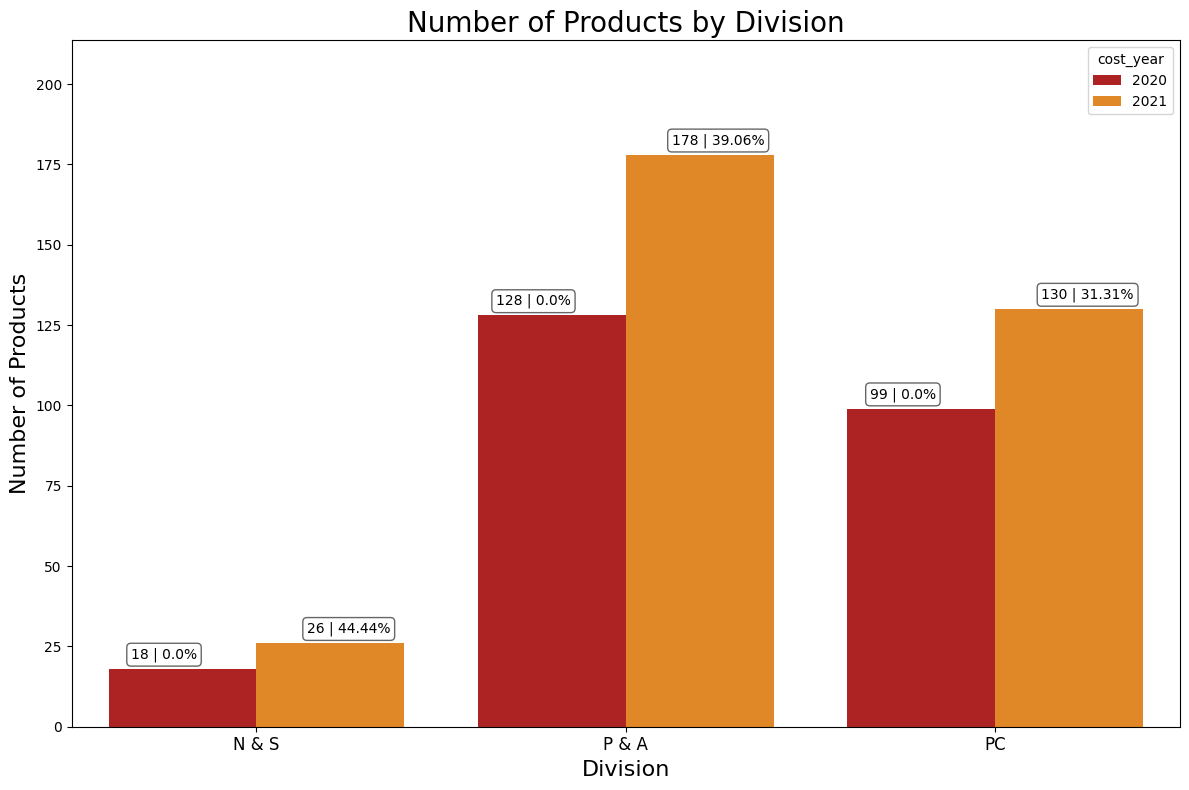

In [13]:
# filter number of products by division
product_by_division = fact_manufacturing_product_cost.groupby(['division', 'cost_year']).agg(number_of_products=('product_code', 'count')).reset_index()
# calculate the percentage change compared to the previous year of the same division
product_by_division['pct_change'] = round(product_by_division.groupby('division')['number_of_products'].pct_change() * 100, 2)
# replace null values with 0 for plotting purposes
product_by_division['pct_change'].fillna(0, inplace=True)
# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(12,8))

# plot the bar chart for the column
sns.barplot(data=product_by_division, x='division', y='number_of_products', hue='cost_year', palette=custom_palette)

# set title and axis labels
plt.title("Number of Products by Division", fontsize=20)
plt.xlabel("Division", fontsize=16)
plt.ylabel("Number of Products", fontsize=16)
plt.xticks(fontsize=12)
plt.ylim(0, product_by_division['number_of_products'].max()*1.2) # increase the y limit to have more space for annotation

# adding annotations
for index, row in product_by_division.iterrows():
    # find the bars position
    x_pos = list(product_by_division['division'].unique()).index(row['division'])
    # get the hue category for proper positioning of annotation
    hue_pos = list(product_by_division['cost_year'].unique()).index(row['cost_year'])

    # calculate offset for bars based on the number of hue categories
    total_hue = product_by_division['cost_year'].nunique()
    x_offset = hue_pos / total_hue - 0.5 / total_hue

    # annotate each bar correctly
    plt.annotate(f"{row['number_of_products']} | {row['pct_change']}%",
                 xy=(x_pos + x_offset, row['number_of_products']),
                 ha='center', va='bottom', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)
                 )

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

##### Number of Product by Divison

###### N & S Division

In [14]:
# number of product by cost year and percentage
product_by_division[product_by_division['division']=='N & S']

,division,cost_year,number_of_products,pct_change
0,N & S,2020,18,0.00
1,N & S,2021,26,44.44


In [15]:
# filter the product manufacturing in 2020 but discontinued in 2021
nns_product_discontinued_2021 = product_manufacturing_2021[
                                                        product_manufacturing_2021['division']=='N & S'].merge(
                                                            product_manufacturing_2020[
                                                            product_manufacturing_2020['division']=='N & S'],
                                                            how='right',
                                                            on='product_code',
                                                            validate='one_to_one')
nns_product_discontinued_2021 = nns_product_discontinued_2021[
                                                            nns_product_discontinued_2021['product_x'].isnull()][['product_code','product_x']].merge(
                                                                product_manufacturing_2020,
                                                                how='inner',
                                                                on='product_code',
                                                                validate='one_to_one'
                                                                ).drop(columns=('product_x')).reset_index(drop=True)
print(f"number of product that produced in 2020 is {product_by_division[(product_by_division['division']=='N & S') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0]}")
print(f"number of product that produced in 2020 but discontinued in 2021 is {nns_product_discontinued_2021.shape[0]}")

number of product that produced in 2020 is 18
number of product that produced in 2020 but discontinued in 2021 is 0


In [16]:
# filter the product discontinued manufacturing in 2021
nns_new_product_2021 = product_manufacturing_2021[
                                                product_manufacturing_2021['division']=='N & S'].merge(
                                                    product_manufacturing_2020[product_manufacturing_2020['division']=='N & S'],
                                                    how='left',
                                                    on='product_code',
                                                    validate='one_to_one')
nns_new_product_2021 = nns_new_product_2021[
                                            nns_new_product_2021['product_y'].isnull()][['product_code','product_y']].merge(
                                                product_manufacturing_2021,
                                                how='inner',
                                                on='product_code',
                                                validate='one_to_one'
                                                ).drop(columns=('product_y')).reset_index(drop=True)
print(f"number of product that manufacturing in 2021 is {product_by_division[(product_by_division['division']=='N & S') & (product_by_division['cost_year']==2021)]['number_of_products'].values[0]}")
print(f"with {nns_new_product_2021.shape[0]} product that are new")

number of product that manufacturing in 2021 is 26
with 8 product that are new


In [17]:
# filter the product_code that haven't produced
nns_non_produced = dim_products[dim_products['division']=='N & S'].merge(
                                                                        fact_manufacturing_product_cost[fact_manufacturing_product_cost['division'] == 'N & S'][['product_code', 'division', 'segment', 'category', 'product', 'variant']].drop_duplicates(),
                                                                        how='left',
                                                                        on='product_code',
                                                                        validate='one_to_one').reset_index(drop=True)
nns_non_produced = nns_non_produced[nns_non_produced['product_y'].isnull()][['product_code','product_y']].merge(
                                                                                                                dim_products,
                                                                                                                how='inner',
                                                                                                                on='product_code',
                                                                                                                validate='one_to_one'
                                                                                                                ).reset_index(drop=True)
print(f"total products of N & S division is {total_product_by_division[(total_product_by_division['division']=='N & S')]['number_of_products'].values[0]}")
print(f"number of products that have produced is {product_by_division[(product_by_division['division']=='N & S') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0] + nns_new_product_2021.shape[0]}")
print(f"number of products that haven't produced is {nns_non_produced.shape[0]}")

total products of N & S division is 36
number of products that have produced is 26
number of products that haven't produced is 10


###### P & A Division

In [18]:
# number of product by cost year and percentage
product_by_division[product_by_division['division']=='P & A']

,division,cost_year,number_of_products,pct_change
2,P & A,2020,128,0.00
3,P & A,2021,178,39.06


In [19]:
# filter the product discontinued manufacturing in 2021
pna_product_discontinued_2021 = product_manufacturing_2021[product_manufacturing_2021['division']=='P & A'].merge(
                                                                                                            product_manufacturing_2020[product_manufacturing_2020['division']=='P & A'],
                                                                                                            how='right',
                                                                                                            on='product_code',
                                                                                                            validate='one_to_one'
                                                                                                            )
pna_product_discontinued_2021 = pna_product_discontinued_2021[pna_product_discontinued_2021['product_x'].isnull()][['product_code','product_x']].merge(
                                                                                                                                                    product_manufacturing_2020,
                                                                                                                                                    how='inner',
                                                                                                                                                    on='product_code',
                                                                                                                                                    validate='one_to_one'
                                                                                                                                                    ).drop(columns=('product_x')).reset_index(drop=True)
print(f"number of product that produced in 2020 is {product_by_division[(product_by_division['division']=='P & A') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0]}")
print(f"number of product that produced in 2020 but discontinued in 2021 is {pna_product_discontinued_2021.shape[0]}")

number of product that produced in 2020 is 128
number of product that produced in 2020 but discontinued in 2021 is 5


In [20]:
# filter the product discontinued manufacturing in 2021
pna_new_product_2021 = product_manufacturing_2021[product_manufacturing_2021['division']=='P & A'].merge(
                                                                                                    product_manufacturing_2020[product_manufacturing_2020['division']=='P & A'],
                                                                                                    how='left',
                                                                                                    on='product_code',
                                                                                                    validate='one_to_one'
                                                                                                    )
pna_new_product_2021 = pna_new_product_2021[pna_new_product_2021['product_y'].isnull()][['product_code','product_y']].merge(
                                                                                                                            product_manufacturing_2021,
                                                                                                                            how='inner',
                                                                                                                            on='product_code',
                                                                                                                            validate='one_to_one'
                                                                                                                            ).drop(columns=('product_y')).reset_index(drop=True)
print(f"number of product that manufacturing in 2021 is {product_by_division[(product_by_division['division']=='P & A') & (product_by_division['cost_year']==2021)]['number_of_products'].values[0]}")
print(f"with {pna_new_product_2021.shape[0]} product that are new")

number of product that manufacturing in 2021 is 178
with 55 product that are new


In [21]:
# filter the product_code that haven't produced
pna_non_produced = dim_products[dim_products['division']=='P & A'].merge(
                                                                        fact_manufacturing_product_cost[fact_manufacturing_product_cost['division'] == 'P & A'][['product_code', 'division', 'segment', 'category', 'product', 'variant']].drop_duplicates(),
                                                                        how='left',
                                                                        on='product_code',
                                                                        validate='one_to_one').reset_index(drop=True)
pna_non_produced = pna_non_produced[pna_non_produced['product_y'].isnull()][['product_code','product_y']].merge(
                                                                                                             dim_products,
                                                                                                             how='inner',
                                                                                                             on='product_code',
                                                                                                             validate='one_to_one'
                                                                                                             ).drop(columns=('product_y')).reset_index(drop=True)
print(f"total products of P & A division is {total_product_by_division[(total_product_by_division['division']=='P & A')]['number_of_products'].values[0]}")
print(f"number of products that have produced is {product_by_division[(product_by_division['division']=='P & A') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0] + pna_new_product_2021.shape[0]}")
print(f"number of products that haven't produced is {pna_non_produced.shape[0]}")

total products of P & A division is 200
number of products that have produced is 183
number of products that haven't produced is 17


###### PC Division

In [22]:
# number of product by cost year and percentage
product_by_division[product_by_division['division']=='PC']

,division,cost_year,number_of_products,pct_change
4,PC,2020,99,0.00
5,PC,2021,130,31.31


In [23]:
# filter the product discontinued manufacturing in 2021
pc_product_discontinued_2021 = product_manufacturing_2021[product_manufacturing_2021['division']=='PC'].merge(
                                                                                                        product_manufacturing_2020[product_manufacturing_2020['division']=='PC'],
                                                                                                        how='right',
                                                                                                        on='product_code',
                                                                                                        validate='one_to_one'
            )
pc_product_discontinued_2021 = pc_product_discontinued_2021[pc_product_discontinued_2021['product_x'].isnull()][['product_code','product_x']].merge(
                                                                                                                                                    product_manufacturing_2020,
                                                                                                                                                    how='inner',
                                                                                                                                                    on='product_code',
                                                                                                                                                    validate='one_to_one'
                                                                                                                                                    ).drop(columns=('product_x')).reset_index(drop=True)
print(f"number of product that produced in 2020 is {product_by_division[(product_by_division['division']=='PC') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0]}")
print(f"number of product that produced in 2020 but discontinued in 2021 is {pc_product_discontinued_2021.shape[0]}")

number of product that produced in 2020 is 99
number of product that produced in 2020 but discontinued in 2021 is 8


In [24]:
# filter the product discontinued manufacturing in 2021
pc_new_product_2021 = product_manufacturing_2021[product_manufacturing_2021['division']=='PC'].merge(
                                                                                                product_manufacturing_2020[product_manufacturing_2020['division']=='PC'],
                                                                                                how='left',
                                                                                                on='product_code',
                                                                                                validate='one_to_one'
                                                                                                )
pc_new_product_2021 = pc_new_product_2021[pc_new_product_2021['product_y'].isnull()][['product_code','product_y']].merge(
                                                                                                                        product_manufacturing_2021,
                                                                                                                        how='inner',
                                                                                                                        on='product_code',
                                                                                                                        validate='one_to_one'
                                                                                                                        ).drop(columns=('product_y')).reset_index(drop=True)
print(f"number of product that manufacturing in 2021 is {product_by_division[(product_by_division['division']=='PC') & (product_by_division['cost_year']==2021)]['number_of_products'].values[0]}")
print(f"with {pc_new_product_2021.shape[0]} product that are new")

number of product that manufacturing in 2021 is 130
with 39 product that are new


In [25]:
pc_non_produced = dim_products[dim_products['division']=='PC'].merge(
                                                                    fact_manufacturing_product_cost[fact_manufacturing_product_cost['division'] == 'PC'][['product_code', 'division', 'segment', 'category', 'product', 'variant']].drop_duplicates(),
                                                                    how='left',
                                                                    on='product_code',
                                                                    validate='one_to_one').reset_index(drop=True)
# filter the product_code that haven't produced
pc_non_produced = pc_non_produced[pc_non_produced['product_y'].isnull()][['product_code','product_y']].merge(
                                                                                                             dim_products,
                                                                                                             how='inner',
                                                                                                             on='product_code',
                                                                                                             validate='one_to_one'
                                                                                                             ).drop(columns=('product_y')).reset_index(drop=True)
print(f"total products of P & A division is {total_product_by_division[(total_product_by_division['division']=='PC')]['number_of_products'].values[0]}")
print(f"number of products that have produced is {product_by_division[(product_by_division['division']=='PC') & (product_by_division['cost_year']==2020)]['number_of_products'].values[0] + pc_new_product_2021.shape[0]}")
print(f"number of products that haven't produced is {pc_non_produced.shape[0]}")

total products of P & A division is 161
number of products that have produced is 138
number of products that haven't produced is 23


#### Number of Products by Segment
Provide a report with all the unique product counts for each  segment  and  sort them in descending order of product counts. columns: segment, product_count

##### Number of Products by Segment for Each Year

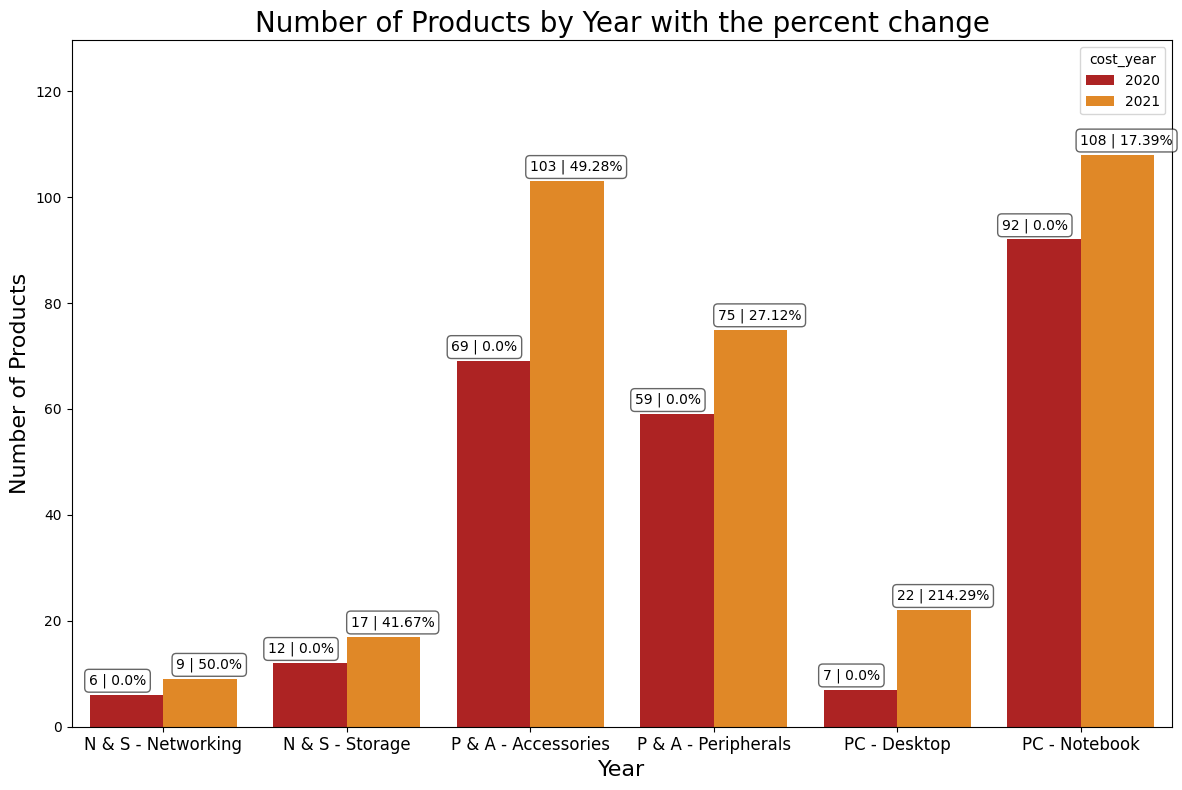

,division,segment,cost_year,number_of_products,pct_change,division_and_segment
0,N & S,Networking,2020,6,0.00,N & S - Networking
1,N & S,Networking,2021,9,50.00,N & S - Networking
2,N & S,Storage,2020,12,0.00,N & S - Storage
3,N & S,Storage,2021,17,41.67,N & S - Storage
4,P & A,Accessories,2020,69,0.00,P & A - Accessories
5,P & A,Accessories,2021,103,49.28,P & A - Accessories
6,P & A,Peripherals,2020,59,0.00,P & A - Peripherals
7,P & A,Peripherals,2021,75,27.12,P & A - Peripherals
8,PC,Desktop,2020,7,0.00,PC - Desktop
9,PC,Desktop,2021,22,214.29,PC - Desktop


In [26]:
# filter number of products by division
product_by_segment = fact_manufacturing_product_cost.groupby(['division', 'segment', 'cost_year']).agg(number_of_products=('product_code','count')).reset_index()
# calculate the percentage change compared to the previous year of the same division
product_by_segment['pct_change'] = round(product_by_segment.groupby(['division','segment'])['number_of_products'].pct_change()*100, 2)
# replace null values with 0 for plotting purpose
product_by_segment['pct_change'].fillna(0, inplace=True)
# create new column to combine "region" and "market" columns
product_by_segment['division_and_segment'] = product_by_segment['division'] + " - " + product_by_segment['segment']

# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(12,8))

# plot the bar chart for the column
sns.barplot(data=product_by_segment, x='division_and_segment', y='number_of_products', hue='cost_year', palette=custom_palette)

# set title and axis labels
plt.title("Number of Products by Year with the percent change", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Products", fontsize=16)
plt.xticks(fontsize=12)
plt.ylim(0, product_by_segment['number_of_products'].max()*1.2) # increase the y limit to have more space for annotation

# adding annotations
for index, row in product_by_segment.iterrows():
    # find the bars position
    x_pos = list(product_by_segment['division_and_segment'].unique()).index(row['division_and_segment'])
    # get the hue category for proper positioning of annotation
    hue_pos = list(product_by_segment['cost_year'].unique()).index(row['cost_year'])

    # calculate offset for bars based on the number of hue categories
    total_hue = product_by_segment['cost_year'].nunique()
    x_offset = hue_pos / total_hue - 0.5 / total_hue

    # annotate each bar correctly
    plt.annotate(f"{row['number_of_products']} | {row['pct_change']}%",
                 xy=(x_pos + x_offset, row['number_of_products']),
                 ha='center', va='bottom', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)
                 )

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

product_by_segment

#### Number of Products by Categories

In [27]:
# filter number of products by division
product_by_category = fact_manufacturing_product_cost.groupby(['division', 'segment', 'category', 'cost_year']).agg(number_of_products=('product_code','count')).reset_index()
# calculate the percentage change compared to the previous year of the same division
product_by_category['pct_change'] = product_by_category.groupby(['division','segment', 'category'])['number_of_products'].pct_change()*100

# replace null values with 0 for plotting purpose
product_by_category['pct_change'].fillna(0, inplace=True)

product_by_category

,division,segment,category,cost_year,number_of_products,pct_change
0,N & S,Networking,Wi fi extender,2020,6,0.000000
1,N & S,Networking,Wi fi extender,2021,9,50.000000
2,N & S,Storage,External Solid State Drives,2020,10,0.000000
3,N & S,Storage,External Solid State Drives,2021,13,30.000000
4,N & S,Storage,USB Flash Drives,2020,2,0.000000
5,N & S,Storage,USB Flash Drives,2021,4,100.000000
6,P & A,Accessories,Batteries,2020,17,0.000000
7,P & A,Accessories,Batteries,2021,19,11.764706
8,P & A,Accessories,Keyboard,2020,28,0.000000
9,P & A,Accessories,Keyboard,2021,41,46.428571


#### Top Product that have the highest and lowest manufacturing costs

##### Product that have the lowest manufacturing cost

In [28]:
# top 20 product that have the lowest manufacturing cost
top20_lowest_cost_product = fact_manufacturing_product_cost[
    (fact_manufacturing_product_cost['cost_year']==fact_manufacturing_product_cost['cost_year'].max())
].sort_values(by='manufacturing_cost', ascending=True).reset_index(drop=True).head(20)

# check data after processing
top20_lowest_cost_product

,product_code,cost_year,manufacturing_cost,division,segment,category,product,variant
0,A6818160201,2021,0.9195,N & S,Storage,USB Flash Drives,AQ Pen Drive DRC,Standard
1,A2118150101,2021,0.9195,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1
2,A2118150102,2021,1.1494,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 2
3,A6818160202,2021,1.1494,N & S,Storage,USB Flash Drives,AQ Pen Drive DRC,Plus
4,A2118150103,2021,1.3027,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Plus 1
5,A6720160103,2021,1.3793,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Premium
6,A2118150105,2021,1.4559,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Premium 1
7,A2118150104,2021,1.4559,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Plus 2
8,A6819160203,2021,1.5326,N & S,Storage,USB Flash Drives,AQ Pen Drive DRC,Premium
9,A2118150106,2021,1.6092,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Premium 2


In [29]:
# get lowest manufacturing cost by category
lowest_cost_by_category= fact_manufacturing_product_cost[fact_manufacturing_product_cost['cost_year']==fact_manufacturing_product_cost['cost_year'].max()].groupby(
    ['division','segment','category','cost_year']).agg(manufacturing_cost=('manufacturing_cost','min')).reset_index()

# top product that have the lowest manufacturing cost
lowest_cost_product_by_category = lowest_cost_by_category.merge(
    fact_manufacturing_product_cost,
    how='inner',
    on=lowest_cost_by_category.columns.tolist(),
    validate='many_to_many'
)
# check data after processing
lowest_cost_product_by_category

,division,segment,category,cost_year,manufacturing_cost,product_code,product,variant
0,N & S,Networking,Wi fi extender,2021,8.5824,A7118160101,AQ Wi Power Dx1,Standard
1,N & S,Storage,External Solid State Drives,2021,4.1379,A6218160101,AQ Digit SSD,Standard
2,N & S,Storage,USB Flash Drives,2021,0.9195,A6818160201,AQ Pen Drive DRC,Standard
3,P & A,Accessories,Batteries,2021,4.8276,A3718150101,AQ LION x1,Standard
4,P & A,Accessories,Keyboard,2021,2.0690,A2918150101,AQ Master wired x1,Standard 1
5,P & A,Accessories,Mouse,2021,0.9195,A2118150101,AQ Master wired x1 Ms,Standard 1
6,P & A,Peripherals,Graphic Card,2021,5.7471,A0418150103,AQ Mforce Gen X,Standard 3
7,P & A,Peripherals,Internal HDD,2021,5.5172,A0118150101,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
8,P & A,Peripherals,MotherBoard,2021,5.8238,A1618150101,AQ MB Elite,Standard
9,P & A,Peripherals,Processors,2021,34.6360,A1018150101,AQ 5000 Series Electron 9 5900X Desktop Processor,Standard


##### Product that have the highest manufacturing cost

In [30]:
# top 20 product that have the highest manufacturing cost
top20_highest_cost_product = fact_manufacturing_product_cost[
    (fact_manufacturing_product_cost['cost_year']==fact_manufacturing_product_cost['cost_year'].max())
].sort_values(by='manufacturing_cost', ascending=False).reset_index(drop=True).head(20)

# check data after processing
top20_highest_cost_product

,product_code,cost_year,manufacturing_cost,division,segment,category,product,variant
0,A6120110206,2021,240.5364,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 3
1,A6120110205,2021,240.3065,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 2
2,A6119110204,2021,238.7739,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 1
3,A6119110203,2021,238.6207,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Standard 3
4,A6119110202,2021,238.2376,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Standard 2
5,A6119110201,2021,237.3180,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Standard 1
6,A6019110108,2021,234.1762,PC,Desktop,Personal Desktop,AQ Home Allin1,Premium 2
7,A6019110107,2021,233.6399,PC,Desktop,Personal Desktop,AQ Home Allin1,Premium 1
8,A6018110106,2021,233.4866,PC,Desktop,Personal Desktop,AQ Home Allin1,Plus 3
9,A6018110105,2021,232.9502,PC,Desktop,Personal Desktop,AQ Home Allin1,Plus 2


In [31]:
# get highest manufacturing cost by category
highest_cost_by_category= fact_manufacturing_product_cost[fact_manufacturing_product_cost['cost_year']==fact_manufacturing_product_cost['cost_year'].max()].groupby(
    ['division','segment','category','cost_year']).agg(manufacturing_cost=('manufacturing_cost','max')).reset_index()

# top product that have the highest manufacturing cost
highest_cost_product_by_category = highest_cost_by_category.merge(
    fact_manufacturing_product_cost,
    how='inner',
    on=lowest_cost_by_category.columns.tolist(),
    validate='many_to_many'
)
# check data after processing
highest_cost_product_by_category

,division,segment,category,cost_year,manufacturing_cost,product_code,product,variant
0,N & S,Networking,Wi fi extender,2021,12.9502,A7321160303,AQ Wi Power Dx3,Premium
1,N & S,Storage,External Solid State Drives,2021,6.5900,A6620160501,AQ Clx3,Standard
2,N & S,Storage,USB Flash Drives,2021,1.5326,A6819160203,AQ Pen Drive DRC,Premium
3,P & A,Accessories,Batteries,2021,9.5019,A4021150405,AQ Mx NB,Premium
4,P & A,Accessories,Keyboard,2021,10.1916,A3521150704,AQ Trigger,Plus 2
5,P & A,Accessories,Keyboard,2021,10.1916,A3521150705,AQ Trigger,Premium 1
6,P & A,Accessories,Mouse,2021,6.2069,A2821150801,AQ Lumina Ms,Standard 1
7,P & A,Peripherals,Graphic Card,2021,13.3333,A0921150601,AQ Marquee P4,Standard
8,P & A,Peripherals,Internal HDD,2021,8.4291,A0321150303,AQ Zion Saga,Premium
9,P & A,Peripherals,MotherBoard,2021,13.1801,A2021150503,AQ MB Lito 2,Plus 2


### III. Gross Price and Manufacturing Cost Exploration

#### Gross Price by Times
- Phân tích:
    - nhóm dữ liệu theo danh mục sản phẩm (category), phân khúc sản phẩm (segment), hoặc phòng ban (division) từ dim_products để phân tích giá bán của từng nhóm cụ thể qua các năm tài chính.
    - Điều này giúp bạn xác định liệu có sản phẩm hoặc nhóm sản phẩm nào có sự thay đổi giá bán đáng kể, từ đó kiểm tra ảnh hưởng của sự thay đổi này lên doanh số bán hàng (ví dụ: tăng giá có dẫn đến giảm doanh số không?).
- Kết quả mong muốn:
    - Bạn có thể trả lời các câu hỏi như: Giá bán của từng danh mục sản phẩm thay đổi như thế nào qua các năm? Sản phẩm hoặc danh mục nào có xu hướng tăng/giảm giá mạnh?
    - Phân tích này giúp xác định xem chiến lược giá bán hiện tại có hiệu quả hay không, đồng thời tìm hiểu sự tương quan giữa giá bán và doanh số.


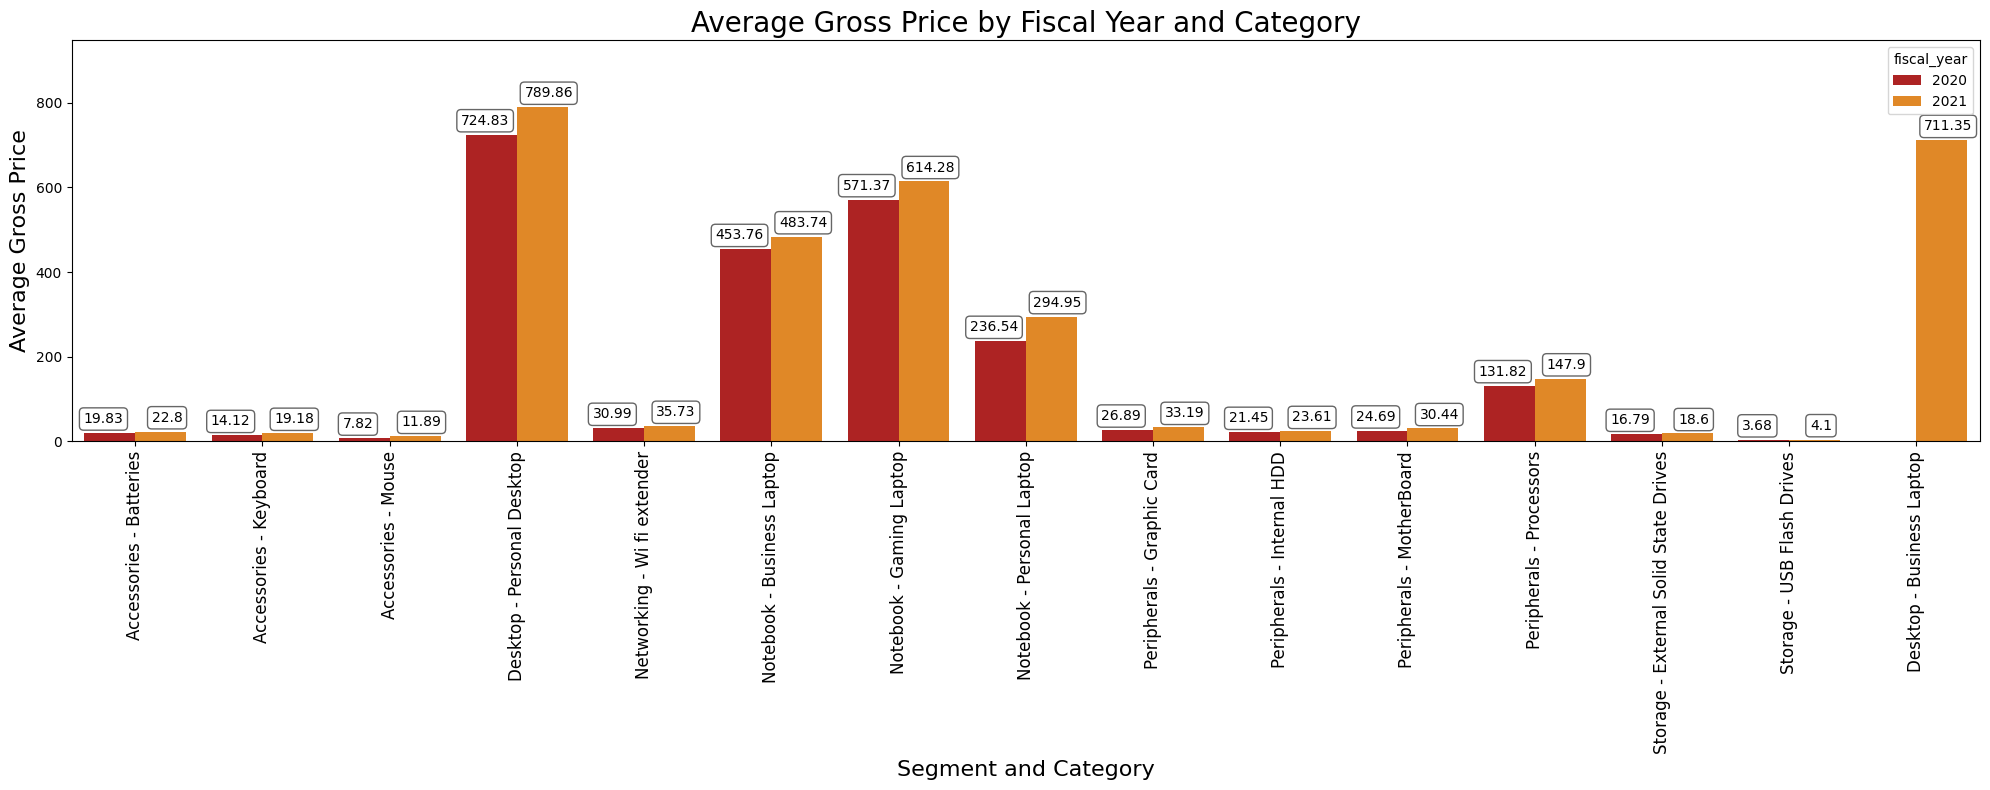

In [47]:
# merge gross price and dim_products on product_code
fact_product_price = fact_gross_price.merge(dim_products, how='left', on='product_code', validate='many_to_one')

# calculate average gross price by fiscal_year and category
avg_price_by_category = fact_product_price.groupby(['fiscal_year','segment','category']).agg(avg_price=('gross_price','mean')).round(2).reset_index()
avg_price_by_category['segment_category'] = avg_price_by_category['segment'] + " - " + avg_price_by_category['category']
# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(20,8))

# plot the bar chart for the column
sns.barplot(data=avg_price_by_category, x='segment_category', y='avg_price', hue='fiscal_year', palette=custom_palette)

# set title and axis labels
plt.title("Average Gross Price by Fiscal Year and Category", fontsize=20)
plt.xlabel("Segment and Category", fontsize=16)
plt.ylabel("Average Gross Price", fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.ylim(0, avg_price_by_category['avg_price'].max()*1.2) # increase the y limit to have more space for annotation

# adding annotations
for index, row in avg_price_by_category.iterrows():
    # find the bars position
    x_pos = list(avg_price_by_category['segment_category'].unique()).index(row['segment_category'])
    # get the hue category for proper positioning of annotation
    hue_pos = list(avg_price_by_category['fiscal_year'].unique()).index(row['fiscal_year'])

    # calculate offset for bars based on the number of hue categories
    total_hue = avg_price_by_category['fiscal_year'].nunique()
    x_offset = hue_pos / total_hue - 0.5 / total_hue

    # annotate each bar correctly
    plt.annotate(f"{row['avg_price']}",
                 xy=(x_pos + x_offset, row['avg_price']),
                 ha='center', va='bottom', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)
                 )

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

#### Compare between Gross Price and Sales by Times
- Phân tích:
    - Bạn có thể kết hợp giá bán (gross_price) và số lượng bán ra (sold_quantity) để xem liệu sự thay đổi giá có tương quan với sự thay đổi doanh số bán hàng.
    - Ví dụ: Khi giá tăng, doanh số có giảm không? Hoặc nếu giá giảm, doanh số có tăng đáng kể không?
- Kết quả mong muốn:
    - Hiểu được tác động của việc thay đổi giá lên doanh số, từ đó giúp đưa ra quyết định về việc điều chỉnh giá trong tương lai để tối ưu hóa doanh thu.

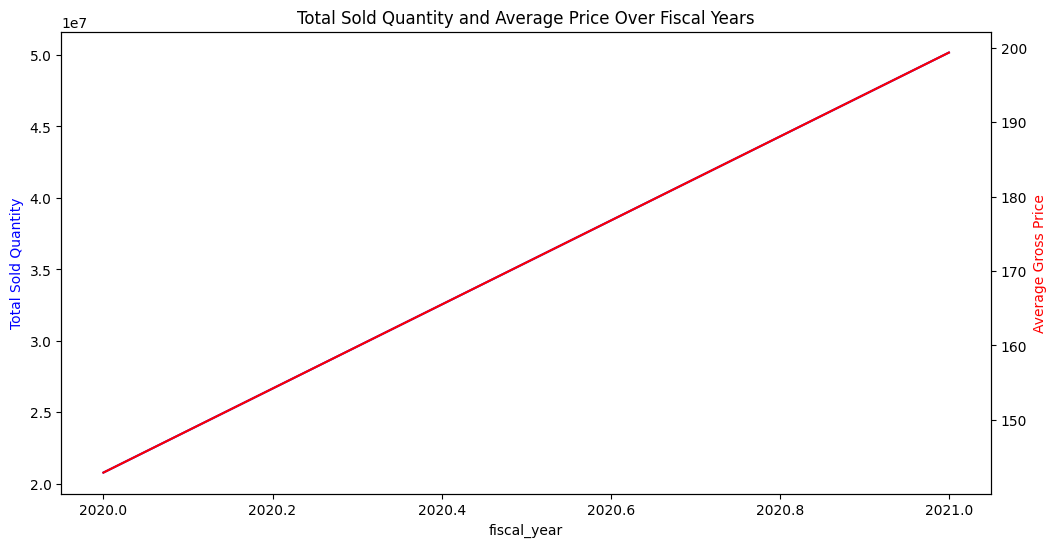

'\nfocus on this sections\n'

In [50]:
# Merge dữ liệu giá bán với doanh số
sales_price_data = pd.merge(fact_sales_monthly, fact_gross_price, on=['product_code', 'fiscal_year'])

# Tính tổng doanh số và giá bán trung bình theo năm tài chính
sales_price_by_year = sales_price_data.groupby('fiscal_year').agg(
    total_sold_quantity=('sold_quantity', 'sum'),
    avg_gross_price=('gross_price', 'mean')
).reset_index()

# Visualization of sales and price over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ doanh số
sns.lineplot(data=sales_price_by_year, x='fiscal_year', y='total_sold_quantity', ax=ax1, color='b')
ax1.set_ylabel('Total Sold Quantity', color='b')
ax1.set_title('Total Sold Quantity and Average Price Over Fiscal Years')

# Tạo trục y thứ hai để vẽ giá bán
ax2 = ax1.twinx()
sns.lineplot(data=sales_price_by_year, x='fiscal_year', y='avg_gross_price', ax=ax2, color='r')
ax2.set_ylabel('Average Gross Price', color='r')

plt.show()
"""
focus on this sections
"""

#### Manufacturing Cost by time and products
Phân tích:

Phân tích sự thay đổi của chi phí sản xuất theo từng nhóm sản phẩm như phân khúc, danh mục, hoặc phòng ban. Bạn có thể so sánh sự biến động của chi phí này qua các năm tài chính, xem xét xu hướng tăng hoặc giảm chi phí sản xuất.

Điều này giúp bạn hiểu rõ hơn về hiệu quả sản xuất và quản lý chi phí cho từng dòng sản phẩm. Nếu chi phí sản xuất có xu hướng tăng nhanh, có thể cần xem xét lại quy trình sản xuất hoặc nguồn cung ứng.

Kết quả mong muốn:

Bạn có thể trả lời các câu hỏi như: Chi phí sản xuất có tăng hay giảm theo thời gian? Những sản phẩm nào có chi phí sản xuất tăng nhanh nhất?

Điều này giúp công ty điều chỉnh chiến lược sản xuất và tối ưu hóa chi phí.

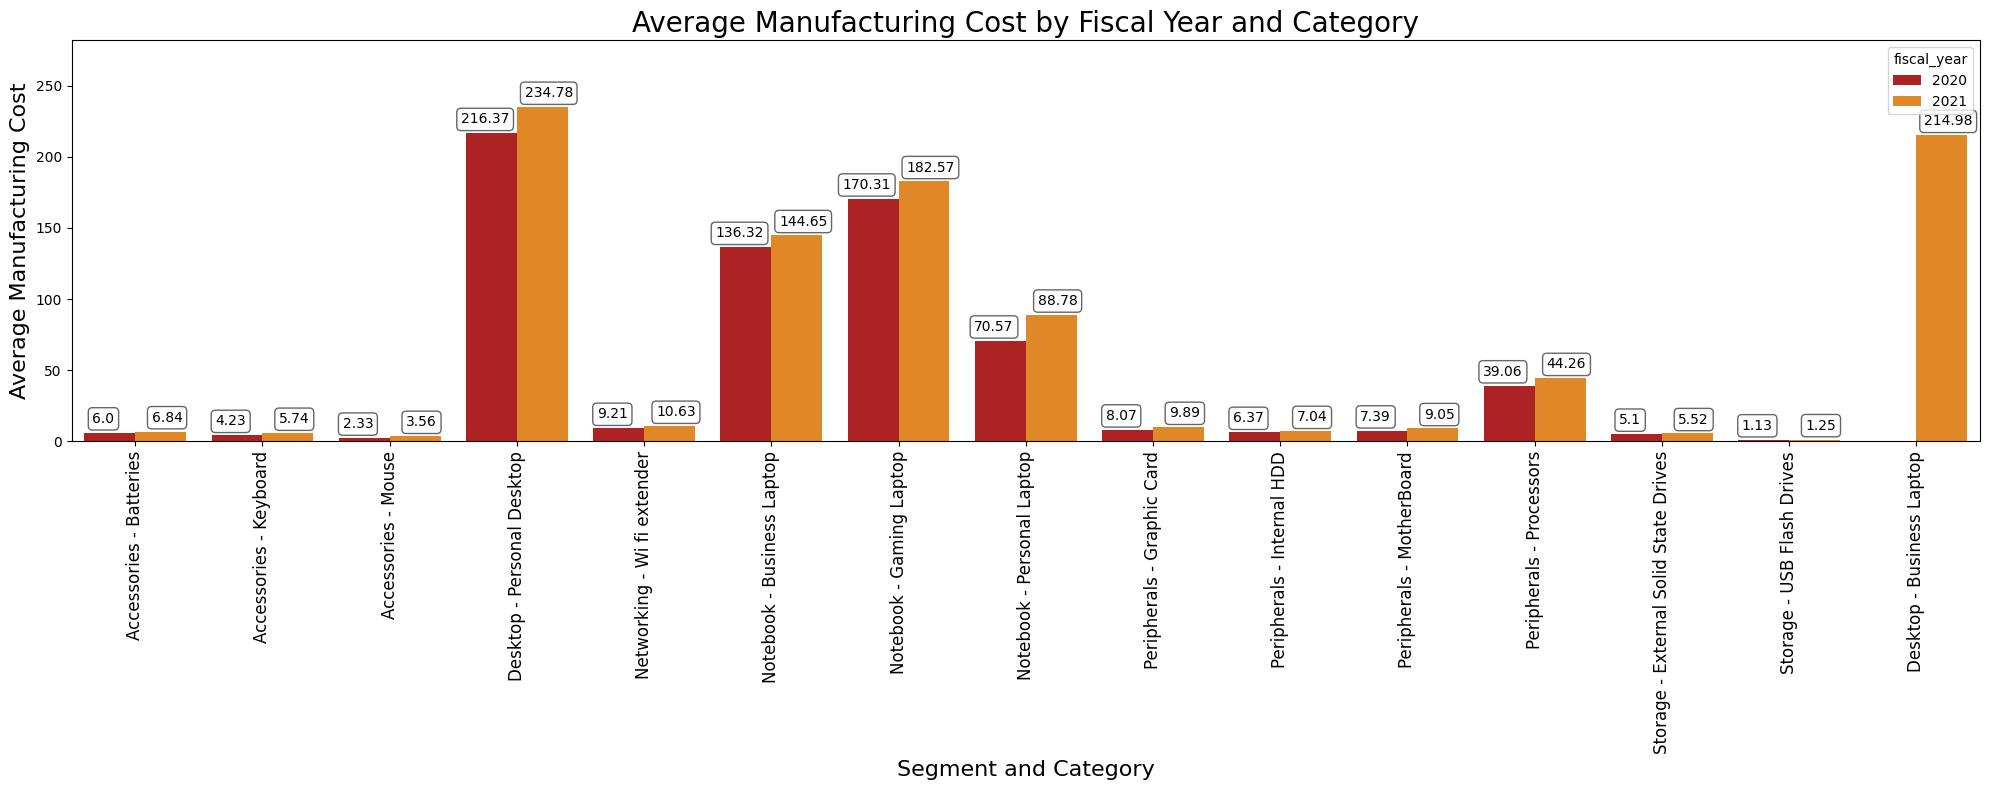

In [52]:
# calculate average gross price by fiscal_year and category
avg_cost_by_category = fact_gross_margin.groupby(['fiscal_year','segment','category']).agg(avg_cost=('manufacturing_cost','mean')).round(2).reset_index()
avg_cost_by_category['segment_category'] = avg_cost_by_category['segment'] + " - " + avg_cost_by_category['category']
# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(20,8))

# plot the bar chart for the column
sns.barplot(data=avg_cost_by_category, x='segment_category', y='avg_cost', hue='fiscal_year', palette=custom_palette)

# set title and axis labels
plt.title("Average Manufacturing Cost by Fiscal Year and Category", fontsize=20)
plt.xlabel("Segment and Category", fontsize=16)
plt.ylabel("Average Manufacturing Cost", fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.ylim(0, avg_cost_by_category['avg_cost'].max()*1.2) # increase the y limit to have more space for annotation

# adding annotations
for index, row in avg_cost_by_category.iterrows():
    # find the bars position
    x_pos = list(avg_cost_by_category['segment_category'].unique()).index(row['segment_category'])
    # get the hue category for proper positioning of annotation
    hue_pos = list(avg_cost_by_category['fiscal_year'].unique()).index(row['fiscal_year'])

    # calculate offset for bars based on the number of hue categories
    total_hue = avg_cost_by_category['fiscal_year'].nunique()
    x_offset = hue_pos / total_hue - 0.5 / total_hue

    # annotate each bar correctly
    plt.annotate(f"{row['avg_cost']}",
                 xy=(x_pos + x_offset, row['avg_cost']),
                 ha='center', va='bottom', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)
                 )

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

#### Compare Manufacturing Cost and Gross Price
Phân tích:

Kết hợp dữ liệu giá bán (gross_price) và chi phí sản xuất (manufacturing_cost) để xác định biên lợi nhuận. Bạn có thể xem xét liệu giá bán có đủ để bù đắp chi phí sản xuất, hoặc nếu có sản phẩm nào có biên lợi nhuận âm.

Phân tích này quan trọng để nhận biết sản phẩm nào có lợi nhuận cao/thấp và xem xét chi phí sản xuất có ảnh hưởng thế nào đến lợi nhuận, sau đó đưa ra chiến lược định giá hợp lý, giúp công ty duy trì lợi nhuận cao.

Kết quả mong muốn:

Hiểu được sự khác biệt giữa chi phí sản xuất và giá bán, giúp xác định sản phẩm nào có biên lợi nhuận cao/thấp và điều chỉnh giá hoặc quy trình sản xuất tương ứng.

In [53]:
# Merge gross price and manufacturing cost on product_code
fact_gross_margin = pd.merge(fact_product_price, fact_manufacturing_cost,
                             left_on=['product_code','fiscal_year'],
                             right_on=['product_code','cost_year']
                             ).drop(columns='cost_year')

# calculate gross margin
fact_gross_margin['gross_margin'] = round(fact_gross_margin['gross_price'] - fact_gross_margin['manufacturing_cost'], 4)

# calculate gross margin percentage
fact_gross_margin['gross_margin_pct'] = round((fact_gross_margin['gross_margin'] / fact_gross_margin['gross_price']) * 100, 2)


fact_gross_margin.head(1)

,product_code,fiscal_year,gross_price,division,segment,category,product,variant,manufacturing_cost,gross_margin,gross_margin_pct
0,A0118150101,2020,16.2323,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,5.0207,11.2116,69.07


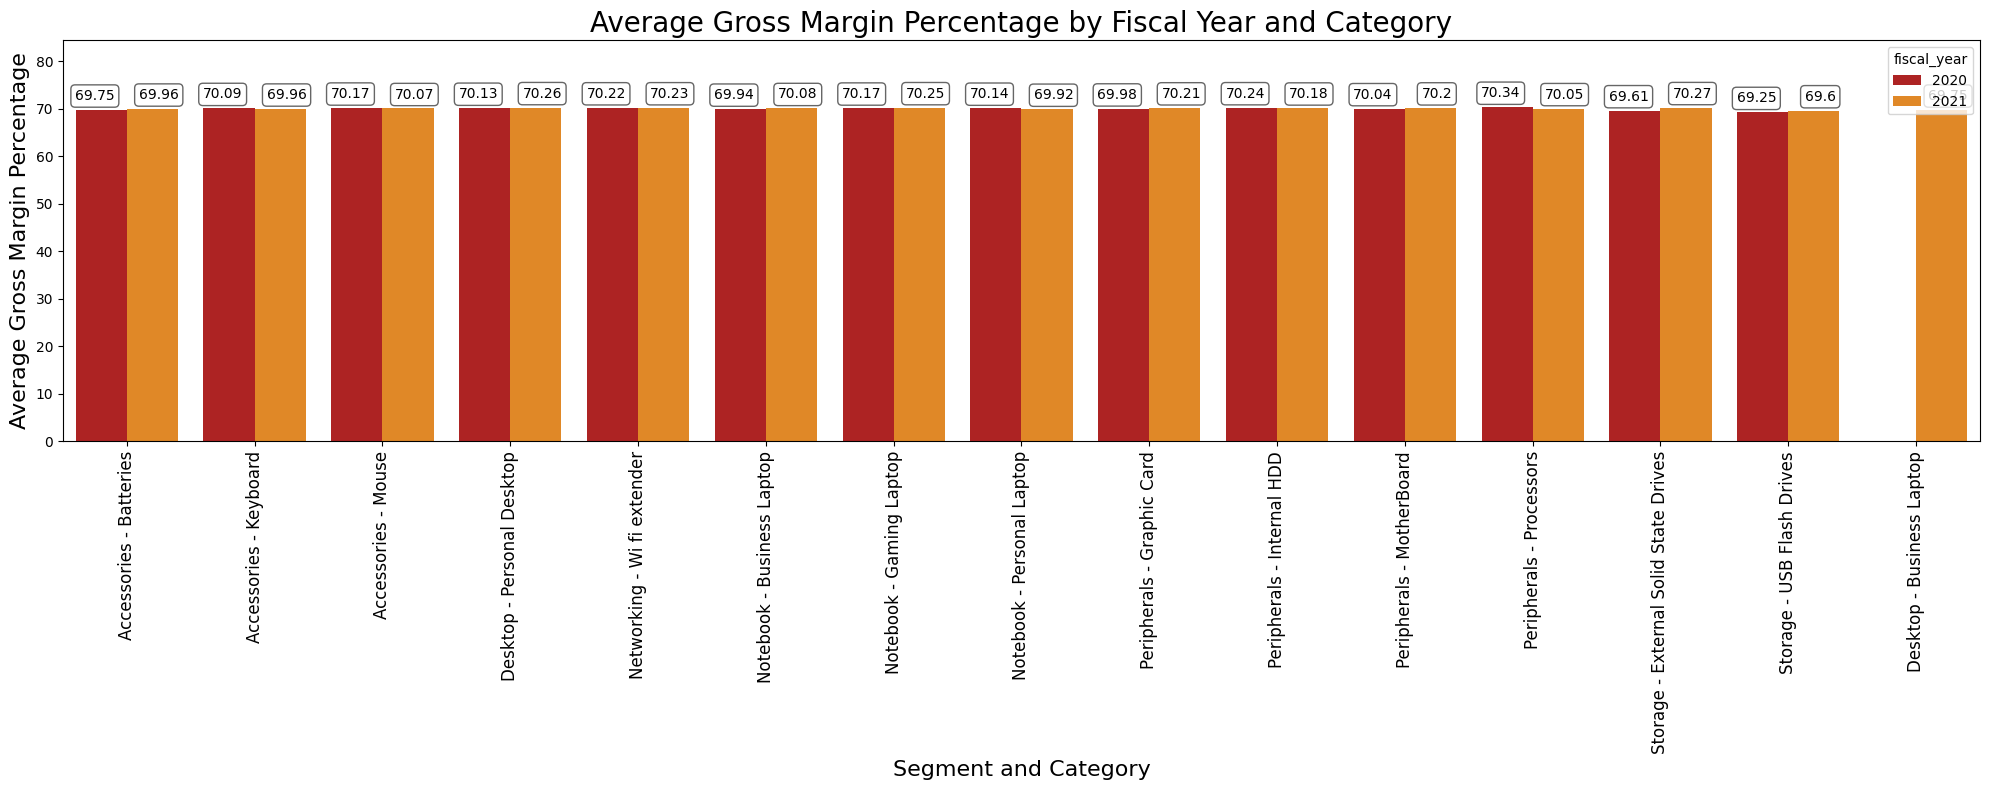

In [54]:
# calculate average gross margin percentage by fiscal_year and category
avg_gross_margin_pct_by_category = fact_gross_margin.groupby(['fiscal_year','segment','category']).agg(avg_gross_margin_pct=('gross_margin_pct','mean')).round(2).reset_index()
avg_gross_margin_pct_by_category['segment_category'] = avg_gross_margin_pct_by_category['segment'] + " - " + avg_gross_margin_pct_by_category['category']
# define a customer palette
custom_palette = {
    2020: "#C40C0C", # dark red
    2021: "#FF8A08" # orange
}
# set the size of the figure
plt.figure(figsize=(20,8))

# plot the bar chart for the column
sns.barplot(data=avg_gross_margin_pct_by_category, x='segment_category', y='avg_gross_margin_pct', hue='fiscal_year', palette=custom_palette)

# set title and axis labels
plt.title("Average Gross Margin Percentage by Fiscal Year and Category", fontsize=20)
plt.xlabel("Segment and Category", fontsize=16)
plt.ylabel("Average Gross Margin Percentage", fontsize=16)
plt.xticks(rotation='vertical', fontsize=12)
plt.ylim(0, avg_gross_margin_pct_by_category['avg_gross_margin_pct'].max()*1.2) # increase the y limit to have more space for annotation

# adding annotations
for index, row in avg_gross_margin_pct_by_category.iterrows():
    # find the bars position
    x_pos = list(avg_gross_margin_pct_by_category['segment_category'].unique()).index(row['segment_category'])
    # get the hue category for proper positioning of annotation
    hue_pos = list(avg_gross_margin_pct_by_category['fiscal_year'].unique()).index(row['fiscal_year'])

    # calculate offset for bars based on the number of hue categories
    total_hue = avg_gross_margin_pct_by_category['fiscal_year'].nunique()
    x_offset = hue_pos / total_hue - 0.5 / total_hue

    # annotate each bar correctly
    plt.annotate(f"{row['avg_gross_margin_pct']}",
                 xy=(x_pos + x_offset, row['avg_gross_margin_pct']),
                 ha='center', va='bottom', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.6)
                 )

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

#### Impact of Manufacturing Cost to Sales
Phân tích:

Xem xét liệu chi phí sản xuất có tác động đáng kể đến doanh thu hay không. Ví dụ, khi chi phí sản xuất tăng, doanh thu có giảm do giá bán không đủ bù đắp chi phí không?

Điều này giúp công ty đánh giá xem chi phí sản xuất có ảnh hưởng đến việc cạnh tranh về giá bán và khả năng sinh lợi nhuận.

Kết quả mong muốn:

Hiểu rõ mối tương quan giữa chi phí sản xuất và doanh thu, từ đó đề xuất các biện pháp cải thiện quy trình sản xuất hoặc điều chỉnh chiến lược định giá.

In [ ]:
# Merge dữ liệu chi phí sản xuất và giá bán
cost_price_data = pd.merge(fact_manufacturing_cost, fact_gross_price, 
                           left_on=['product_code', 'cost_year'],
                           right_on=['product_code', 'fiscal_year']
                           )

# Tính biên lợi nhuận (Gross Margin) bằng cách lấy giá bán trừ chi phí sản xuất
cost_price_data['gross_margin'] = cost_price_data['gross_price'] - cost_price_data['manufacturing_cost']

# Tính biên lợi nhuận trung bình theo năm tài chính
avg_margin_by_year = cost_price_data.groupby('fiscal_year')['gross_margin'].mean().reset_index()

# Visualization of average gross margin over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_margin_by_year, x='fiscal_year', y='gross_margin')
plt.title('Average Gross Margin Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Gross Margin')
plt.xticks(rotation=45)
plt.show()


### III. Sales Exploration

#### Sales and Sales Trends by Times

- Phân tích:
    - Xác định các tháng hoặc quý có doanh số cao nhất và thấp nhất.
    - So sánh doanh số giữa các năm để xem xu hướng thay đổi mùa vụ.
- Kết quả mong muốn:
    - Thời điểm nào trong năm là cao điểm bán hàng (để tối ưu hóa chiến dịch marketing, quản lý hàng tồn kho).

##### Sales by Year

In [151]:
# Convert 'date' to datetime format and extract month and year
fact_sales_monthly['date'] = pd.to_datetime(fact_sales_monthly['date'])
fact_sales_monthly['year'] = fact_sales_monthly['date'].dt.year
fact_sales_monthly['quarter'] = fact_sales_monthly['date'].dt.quarter
fact_sales_monthly['month'] = fact_sales_monthly['date'].dt.month

# Calculate total sales by month and year
sales_by_year = fact_sales_monthly.groupby(['year'])['sold_quantity'].sum().reset_index()
sales_by_year

,year,sold_quantity
0,2019,10189824
1,2020,31684973
2,2021,29062674


##### Sales by Quarter

In [152]:
# Calculate total sales by month and year
sales_by_quarter = fact_sales_monthly.groupby(['year','quarter'])['sold_quantity'].sum().reset_index()
sales_by_quarter

,year,quarter,sold_quantity
0,2019,3,1764002
1,2019,4,8425822
2,2020,1,3704398
3,2020,2,3395899
4,2020,3,7137551
5,2020,4,17447125
6,2021,1,10861386
7,2021,2,10831277
8,2021,3,7370011


##### Sales by Month

In [153]:
# Calculate total sales by month and year
sales_by_month = fact_sales_monthly.groupby(['year','month'])['sold_quantity'].sum().reset_index()
sales_by_month

,year,month,sold_quantity
0,2019,9,1764002
1,2019,10,2190792
2,2019,11,3050825
3,2019,12,3184205
4,2020,1,1762652
5,2020,2,1702785
6,2020,3,238961
7,2020,4,819956
8,2020,5,1016170
9,2020,6,1559773


#### Sales by Products and Times
- Phân tích:
    - Tính tổng số lượng bán (sold_quantity) theo tháng hoặc năm tài chính (fiscal_year).
    - Kết hợp với bảng dim_products, bạn có thể tính doanh số bán hàng theo từng sản phẩm, phân khúc (segment), danh mục (category), hoặc phòng ban (division).
- Kết quả mong muốn:
    - Xu hướng tăng hoặc giảm của tổng doanh số theo thời gian.
    - Các sản phẩm, phân khúc hoặc phòng ban nào có doanh số cao nhất và thấp nhất.


##### Sales by Division

In [154]:
# Merge fact_sales_monthly with dim_products
fact_sales_product = pd.merge(fact_sales_monthly, dim_products, on='product_code')
# Calculate sales by product division and time
sales_by_division = fact_sales_product.groupby(['year','month','division'])['sold_quantity'].sum().reset_index()
sales_by_division

,year,month,division,sold_quantity
0,2019,9,N & S,477714
1,2019,9,P & A,1243567
2,2019,9,PC,42721
3,2019,10,N & S,591339
4,2019,10,P & A,1545144
...,...,...,...,...
67,2021,7,P & A,2802231
68,2021,7,PC,108317
69,2021,8,N & S,785584
70,2021,8,P & A,2790199


##### Sales by Segment

In [155]:
# Calculate sales by product segment and time
sales_by_segment = fact_sales_product.groupby(['year','month','division','segment'])['sold_quantity'].sum().reset_index()
sales_by_segment

,year,month,division,segment,sold_quantity
0,2019,9,N & S,Networking,139292
1,2019,9,N & S,Storage,338422
2,2019,9,P & A,Accessories,1038645
3,2019,9,P & A,Peripherals,204922
4,2019,9,PC,Desktop,207
...,...,...,...,...,...
138,2021,8,N & S,Storage,604516
139,2021,8,P & A,Accessories,2369562
140,2021,8,P & A,Peripherals,420637
141,2021,8,PC,Desktop,9422


##### Sales by Category

In [156]:
# Calculate sales by product category and time
sales_by_category = fact_sales_product.groupby(['year','month','division','segment','category'])['sold_quantity'].sum().reset_index()
sales_by_category

,year,month,division,segment,category,sold_quantity
0,2019,9,N & S,Networking,Wi fi extender,139292
1,2019,9,N & S,Storage,External Solid State Drives,257282
2,2019,9,N & S,Storage,USB Flash Drives,81140
3,2019,9,P & A,Accessories,Batteries,3090
4,2019,9,P & A,Accessories,Keyboard,492228
...,...,...,...,...,...,...
342,2021,8,PC,Desktop,Business Laptop,7002
343,2021,8,PC,Desktop,Personal Desktop,2420
344,2021,8,PC,Notebook,Business Laptop,22904
345,2021,8,PC,Notebook,Gaming Laptop,18753


#### Sales by Customer
- Phân tích:
    - Tính doanh số bán hàng theo khu vực (region, sub_zone), kênh bán hàng (channel), hoặc nền tảng (platform).
- Kết quả mong muốn:
    - Những khu vực và kênh bán hàng nào đang đóng góp nhiều nhất vào tổng doanh thu?
    - Khách hàng nào có giá trị mua hàng lớn nhất (key customers)?

##### Sales by Region

In [157]:
# Merge fact_sales_monthly with dim_products
fact_sales_customer = pd.merge(fact_sales_monthly, dim_customers, on='customer_code')
# Calculate sales by customer region
sales_by_region = fact_sales_customer.groupby(['year','region'])['sold_quantity'].sum().reset_index()
sales_by_region


,year,region,sold_quantity
0,2019,APAC,5722550
1,2019,EU,2217607
2,2019,LATAM,66411
3,2020,APAC,17457087
4,2020,EU,7142017
5,2020,LATAM,194093
6,2021,APAC,15864338
7,2021,EU,6911644
8,2021,LATAM,113564


##### Sales by Sub Zone

In [158]:
# Calculate sales by customer region
sales_by_subzone = fact_sales_customer.groupby(['year','region','sub_zone'])['sold_quantity'].sum().reset_index()
sales_by_subzone

,year,region,sub_zone,sold_quantity
0,2019,APAC,ANZ,583323
1,2019,APAC,India,2557293
2,2019,APAC,ROA,2581934
3,2019,EU,NE,1213636
4,2019,EU,SE,1003971
5,2019,LATAM,LATAM,66411
6,2020,APAC,ANZ,1713810
7,2020,APAC,India,8595336
8,2020,APAC,ROA,7147941
9,2020,EU,NE,3911668


##### Sales by Market

In [159]:
# Calculate sales by customer region
sales_by_market = fact_sales_customer.groupby(['year','region','sub_zone','market'])['sold_quantity'].sum().reset_index()
sales_by_market

,year,region,sub_zone,market,sold_quantity
0,2019,APAC,ANZ,Australia,445700
1,2019,APAC,ANZ,Newzealand,137623
2,2019,APAC,India,India,2557293
3,2019,APAC,ROA,Bangladesh,101938
4,2019,APAC,ROA,China,271021
...,...,...,...,...,...
70,2021,EU,SE,Spain,684888
71,2021,LATAM,LATAM,Brazil,37059
72,2021,LATAM,LATAM,Chile,26304
73,2021,LATAM,LATAM,Columbia,7777


### IV. Gross Sales and Gross Sales Trends by Times

In [160]:
# Merge fact_sales_monthly with fact_gross_price
fact_gross_sales_monthly = pd.merge(fact_sales_monthly, fact_gross_price,
                                    left_on=['product_code','fiscal_year'],
                                    right_on=['product_code','fiscal_year'],
                                    how='left'
                                    ).reset_index(drop=True)
fact_gross_sales_monthly['gross_sales'] = round(fact_gross_sales_monthly['sold_quantity'] * fact_gross_sales_monthly['gross_price'],2)

##### Gross Sales by Year

In [161]:
# calculate total gross sales by year
gross_sales_by_year = fact_gross_sales_monthly.groupby(['year'])['gross_sales'].sum().reset_index()
gross_sales_by_year

,year,gross_sales
0,2019,2.640373e+08
1,2020,9.730184e+08
2,2021,9.635294e+08


##### Gross Sales by Quarter
In which quarter, got the maximum total_sold_quantity? columns: quarter, total_sold_quantity.

In [162]:
# calculate total gross sales by quarter
gross_sales_by_quarter = fact_gross_sales_monthly.groupby(['year','quarter']).agg(gross_sales=("gross_sales",'sum')).reset_index()
gross_sales_by_quarter

,year,quarter,gross_sales
0,2019,3,4.514528e+07
1,2019,4,2.188920e+08
2,2020,1,9.496434e+07
3,2020,2,8.693557e+07
4,2020,3,2.112516e+08
5,2020,4,5.798668e+08
6,2021,1,3.602988e+08
7,2021,2,3.592717e+08
8,2021,3,2.439589e+08


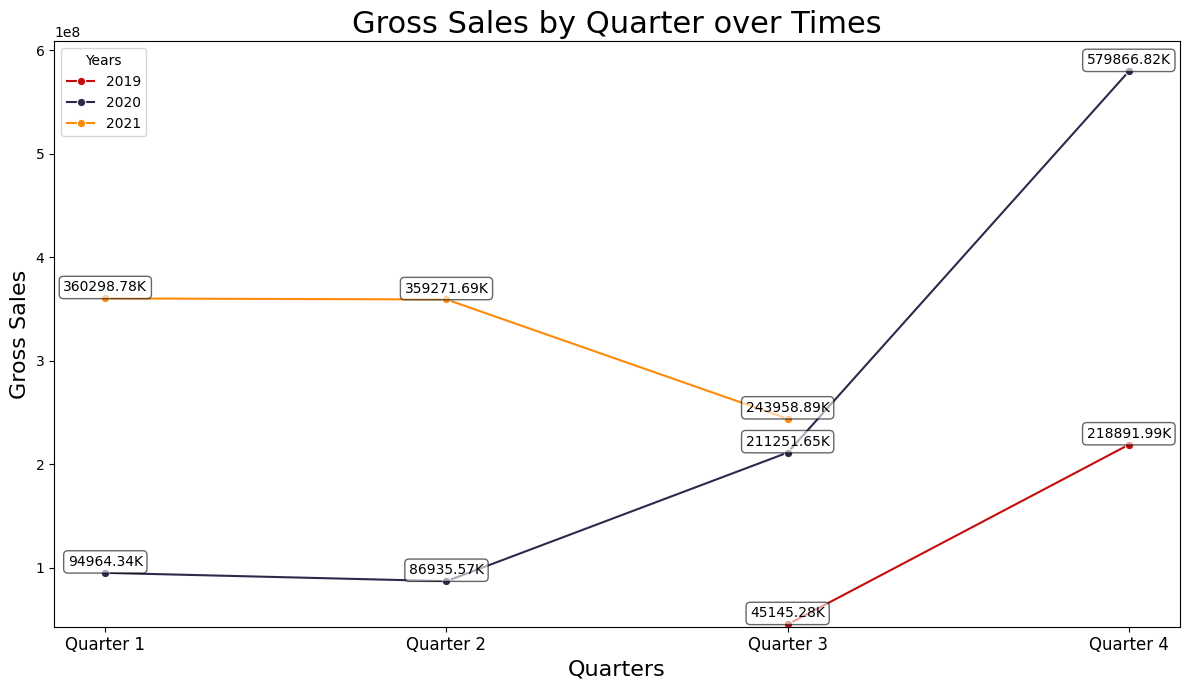

In [163]:
# define a custom color palette
custom_palette= {
    2019: "#C40C0C", # dark red
    2020: "#2B2A4C", # dark navy
    2021: "#FF8A08" # orange
}

# set the size of the figure
plt.figure(figsize=(12,7))

# plot the line chart for the columns with custom palette
ax = sns.lineplot(data=gross_sales_by_quarter, x='quarter', y='gross_sales', hue='year', marker='o', palette=custom_palette)

# set title and axis labels
plt.title('Gross Sales by Quarter over Times', fontsize=22)
plt.xlabel('Quarters', fontsize=16)
plt.ylabel('Gross Sales', fontsize=16)
plt.xticks(range(1,5), labels=['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], fontsize=12) # set x-ticks with labels
plt.ylim(gross_sales_by_quarter['gross_sales'].min()*0.95, gross_sales_by_quarter['gross_sales'].max()*1.05)

# annotate values at each marker
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for i, (x,y) in enumerate(zip(xdata, ydata)):
        ax.annotate(f'{y/1e3:.2f}K',
                    (x,y),
                    textcoords='offset points',
                    xytext=(0,5), ha='center', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.6)
                    )

# display legend
plt.legend(title='Years')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

##### Gross Sales by Month

Get Gross sales amount for each month. This analysis helps to get an idea of low and high-performing months and take strategic decisions. columns: Month, Year, Gross sales Amount

In [164]:
# calculate total gross sales by month
gross_sales_by_month = fact_gross_sales_monthly.groupby(['year','month']).agg(gross_sales=("gross_sales",'sum')).reset_index()
display(gross_sales_by_month)

,year,month,gross_sales
0,2019,9,4.514528e+07
1,2019,10,5.672549e+07
2,2019,11,7.867204e+07
3,2019,12,8.349446e+07
4,2020,1,4.541579e+07
5,2020,2,4.397147e+07
6,2020,3,5.577082e+06
7,2020,4,2.061070e+07
8,2020,5,2.623510e+07
9,2020,6,4.008977e+07


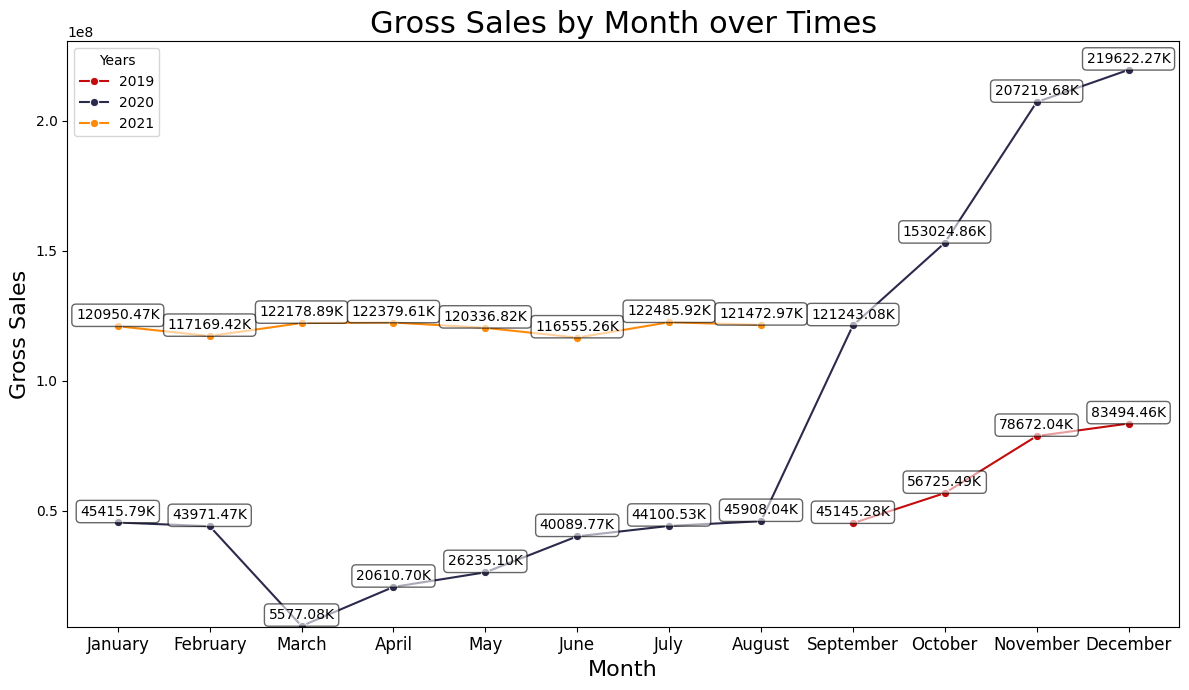

In [165]:
# define a custom color palette
custom_palette= {
    2019: "#C40C0C", # dark red
    2020: "#2B2A4C", # dark navy
    2021: "#FF8A08" # orange
}

# set the size of the figure
plt.figure(figsize=(12,7))

# plot the line chart for the columns with custom palette
ax = sns.lineplot(data=gross_sales_by_month, x='month', y='gross_sales', hue='year', marker='o', palette=custom_palette)

# set title and axis labels
plt.title('Gross Sales by Month over Times', fontsize=22)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Gross Sales', fontsize=16)
plt.xticks(range(1,13), labels=["January", "February", "March", "April", "May", "June", "July",
                                "August", "September", "October", "November", "December"], fontsize=12) # set x-ticks with labels
plt.ylim(gross_sales_by_month['gross_sales'].min()*0.95, gross_sales_by_month['gross_sales'].max()*1.05)

# annotate values at each marker
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for i, (x,y) in enumerate(zip(xdata, ydata)):
        ax.annotate(f'{y/1e3:.2f}K',
                    (x,y),
                    textcoords='offset points',
                    xytext=(0,5), ha='center', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.6)
                    )

# display legend
plt.legend(title='Years')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

#### Gross Sales by Channel and Percentage

Which channel helped to bring more gross sales in each fiscal year and the percentage of contribution? columns: channel, gross_sales, percentage 

In [166]:
# revenue with customer information
fact_revenue_by_customer = fact_revenue_monthly.merge(dim_customers,
                                                      how='left',
                                                      on='customer_code',
                                                      validate='many_to_one'
                                                      )

In [167]:
# calculate total sold quantity for each fiscal_year, platform, and channel
gross_sales_by_channel = fact_revenue_by_customer.groupby(['fiscal_year','platform','channel']
                                                          ).agg(total_sold_quantity=("sold_quantity", 'sum'),
                                                                gross_sales=("gross_sales", 'sum')).reset_index()

# create a new column to combine "platform" and "channel" columns
gross_sales_by_channel['platform&channel'] = gross_sales_by_channel['platform'] + " - " + gross_sales_by_channel['channel']

# calculate total gross sales for each fiscal_year and platform
gross_sales_by_channel['total_gross_sales'] = gross_sales_by_channel.groupby(['fiscal_year'])['gross_sales'].transform('sum')

# calculate the percentage of gross_sales
gross_sales_by_channel['percentage'] = (gross_sales_by_channel['gross_sales'] / gross_sales_by_channel['total_gross_sales']) * 100

# drop 'total_gross_sales' column if not needed
gross_sales_by_channel = gross_sales_by_channel.drop(columns=['total_gross_sales'])

# check data after processing
gross_sales_by_channel


,fiscal_year,platform,channel,total_sold_quantity,gross_sales,platform&channel,percentage
0,2020,Brick & Mortar,Direct,1291686,3.322416e+07,Brick & Mortar - Direct,6.199164
1,2020,Brick & Mortar,Distributor,2328641,6.043960e+07,Brick & Mortar - Distributor,11.277186
2,2020,Brick & Mortar,Retailer,9251009,2.376789e+08,Brick & Mortar - Retailer,44.347568
3,2020,E-Commerce,Direct,2455686,6.320769e+07,E-Commerce - Direct,11.793674
4,2020,E-Commerce,Retailer,5445867,1.413954e+08,E-Commerce - Retailer,26.382409
5,2021,Brick & Mortar,Direct,3538287,1.176826e+08,Brick & Mortar - Direct,7.069554
6,2021,Brick & Mortar,Distributor,5632386,1.880256e+08,Brick & Mortar - Distributor,11.295278
7,2021,Brick & Mortar,Retailer,26884709,8.897325e+08,Brick & Mortar - Retailer,53.448970
8,2021,E-Commerce,Direct,4205164,1.398494e+08,E-Commerce - Direct,8.401185
9,2021,E-Commerce,Retailer,9904036,3.293491e+08,E-Commerce - Retailer,19.785013


#### Top 3 Products that have a high total sold quantity

Get the Top 3 products in each division that have a high  total_sold_quantity? columns: fiscal_year, division, product_code, product, total_sold_quantity, rank_order.

In [168]:
# revenue with products information
fact_revenue_by_product = fact_revenue_monthly.merge(dim_products,
                                                     how='left',
                                                     on='product_code',
                                                     validate='many_to_one'
                                                     )

In [169]:
# total sold quantity by_product
total_sold_quantity_by_product = fact_revenue_by_product.groupby(['fiscal_year','division','product_code','product']).agg(
    total_sold_quantity=("sold_quantity","sum"),
    gross_sales= ("gross_sales","sum")
).reset_index()
# ranking product sold quantity
total_sold_quantity_by_product['rank_order'] = total_sold_quantity_by_product.groupby(['fiscal_year','division'])['total_sold_quantity'].rank(method='dense', ascending=False).astype(int)

# top 3 product in each division
top3_product_sold_quantity = total_sold_quantity_by_product[total_sold_quantity_by_product['rank_order']<=3].sort_values(by=['fiscal_year','division','rank_order'], ascending=True).reset_index(drop=True)
# check data after processing
top3_product_sold_quantity

,fiscal_year,division,product_code,product,total_sold_quantity,gross_sales,rank_order
0,2020,N & S,A6720160103,AQ Pen Drive 2 IN 1,457849,2.006844e+06,1
1,2020,N & S,A6818160201,AQ Pen Drive DRC,457783,1.359204e+06,2
2,2020,N & S,A6419160301,AQ Clx1,314947,5.860502e+06,3
3,2020,P & A,A2319150306,AQ Gamers Ms,269528,2.827942e+06,1
4,2020,P & A,A2419150403,AQ Lite Ms,265764,2.837376e+06,2
5,2020,P & A,A2218150202,AQ Master wireless x1 Ms,265297,1.558222e+06,3
6,2020,PC,A4218110205,AQ Digit,8767,2.116396e+06,1
7,2020,PC,A4118110107,AQ Aspiron,8737,1.593798e+06,2
8,2020,PC,A4218110203,AQ Digit,8705,1.801625e+06,3
9,2021,N & S,A6720160103,AQ Pen Drive 2 IN 1,701373,3.114868e+06,1


### Revenue and Profit Exploration:

#### Revenue analysis by customer, sales channel, and region
Determine which customers, channels, or regions generate the most revenue.
Phân tích:

Tính toán tổng doanh thu từ mỗi khách hàng bằng cách kết hợp số lượng bán ra (sold_quantity) và giá bán (gross_price). Bạn có thể phân nhóm khách hàng theo kênh bán hàng, khu vực, hoặc thị trường từ dim_customer để xác định các nhóm khách hàng có đóng góp doanh thu lớn nhất.

Điều này giúp bạn hiểu rõ ai là khách hàng mang lại doanh thu cao nhất, cũng như nhóm khách hàng nào cần tăng cường tiếp cận.

Kết quả mong muốn:

Trả lời các câu hỏi như: Khách hàng nào đóng góp doanh thu cao nhất? Doanh thu đến từ kênh bán hàng hoặc khu vực nào là nhiều nhất?

Phân tích này giúp công ty xác định khách hàng chiến lược và tập trung tài nguyên vào những nhóm mang lại lợi nhuận cao.

In [ ]:
# Merge dữ liệu doanh thu với thông tin khách hàng
sales_customer_data = pd.merge(fact_sales_monthly, dim_customer, on='customer_code')
sales_customer_data = pd.merge(sales_customer_data, fact_gross_price, on=['product_code', 'fiscal_year'])

# Tính tổng doanh thu từ khách hàng bằng cách nhân số lượng bán với giá bán
sales_customer_data['revenue'] = sales_customer_data['sold_quantity'] * sales_customer_data['gross_price']

# Tính doanh thu trung bình theo khu vực (region)
avg_revenue_by_region = sales_customer_data.groupby('region')['revenue'].sum().reset_index()

# Visualization of revenue by region
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_revenue_by_region, x='region', y='revenue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Profit analysis by customer:
Analyze the most profitable customers or customer groups.
Phân tích:

Tính toán lợi nhuận từ từng khách hàng bằng cách trừ chi phí sản xuất khỏi doanh thu. Phân tích này giúp bạn hiểu khách hàng nào mang lại lợi nhuận cao nhất, cũng như đánh giá nhóm khách hàng tiềm năng cần được chăm sóc đặc biệt.

Bạn có thể phân tích lợi nhuận theo thị trường, kênh bán hàng, hoặc khu vực.

Kết quả mong muốn:

Trả lời câu hỏi như: Nhóm khách hàng nào có lợi nhuận cao nhất? Khu vực hoặc thị trường nào có biên lợi nhuận tốt nhất?

Điều này giúp công ty điều chỉnh chiến lược chăm sóc khách hàng, cải thiện hiệu quả kinh doanh.

In [ ]:
# Merge dữ liệu để tính lợi nhuận từ khách hàng
sales_cost_data = pd.merge(fact_sales_monthly, fact_gross_price, on=['product_code', 'fiscal_year'])
sales_cost_data = pd.merge(sales_cost_data, fact_manufacturing_cost,
left_on=['product_code','fiscal_year'],
right_on=['product_code', 'cost_year'])

# Tính lợi nhuận từ khách hàng
sales_cost_data['profit'] = (sales_cost_data['gross_price'] - sales_cost_data['manufacturing_cost']) * sales_cost_data['sold_quantity']
# merge data from dim_customers
sales_cost_data = sales_cost_data.merge(dim_customers, on='customer_code')
# Tính lợi nhuận trung bình theo kênh bán hàng (channel)
profit_by_channel = sales_cost_data.groupby('channel')['profit'].sum().reset_index()

# Visualization of profit by channel
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_channel, x='channel', y='profit')
plt.title('Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis between Influencing Factors

### Correlation between price, cost, and sales
Understand how product price and manufacturing costs are related to sales volumes.


Phân tích:

Xem xét mối tương quan giữa giá bán, chi phí sản xuất, và doanh số bán hàng để hiểu liệu có sự ảnh hưởng qua lại giữa các yếu tố này hay không. Ví dụ, liệu việc tăng chi phí sản xuất có làm giảm doanh số? Hoặc nếu giá bán tăng, doanh số có bị ảnh hưởng?

Phân tích tương quan giúp bạn xác định những yếu tố nào có ảnh hưởng lớn nhất đến doanh thu và lợi nhuận.

Kết quả mong muốn:

Hiểu rõ mối liên hệ giữa các yếu tố quan trọng, giúp đưa ra chiến lược tối ưu về giá, sản xuất và marketing.


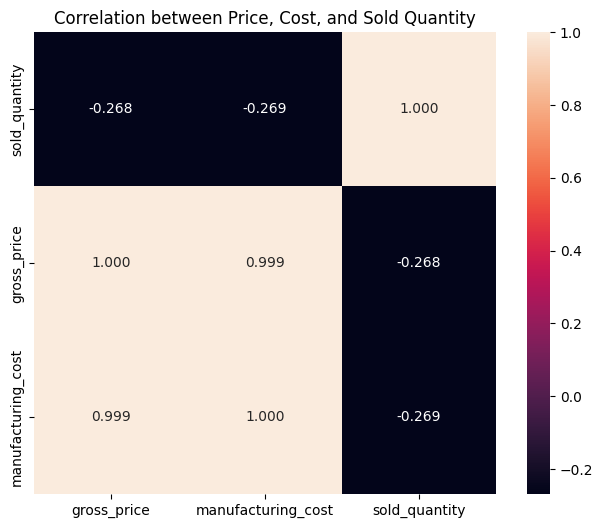

In [ ]:
# Merge dữ liệu giá bán, chi phí sản xuất và doanh số
merged_data = pd.merge(fact_sales_monthly, fact_gross_price, on=['product_code', 'fiscal_year'])
merged_data = pd.merge(merged_data, fact_manufacturing_cost,
                       left_on=['product_code','fiscal_year'],
                       right_on=['product_code', 'cost_year'])

# Tạo dataframe tương quan
correlation_data = merged_data[['gross_price', 'manufacturing_cost', 'sold_quantity']]

# Tính toán ma trận tương quan
correlation_matrix = correlation_data.corr().sort_values('sold_quantity', ascending=False)

# Visualization of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, fmt='.3f', square = True, annot = True, linecolor ='black')
plt.title('Correlation between Price, Cost, and Sold Quantity')
plt.show()


### Correlation between discounts and sales
Evaluate how discount rates correlate with sales volumes and determine if higher discounts lead to higher sales.

Phân tích:

Phân tích mối quan hệ giữa tỷ lệ chiết khấu và doanh số bán hàng để hiểu tác động của các chương trình chiết khấu lên doanh thu. Ví dụ, nếu tỷ lệ chiết khấu tăng, doanh thu có tăng tương ứng không?

Điều này giúp bạn đánh giá hiệu quả của các chương trình khuyến mãi và chiết khấu, từ đó tối ưu hóa chiến lược marketing.

Kết quả mong muốn:

Trả lời câu hỏi như: Chiết khấu có tác động tích cực hay tiêu cực đến doanh thu? Mức chiết khấu tối ưu để đạt doanh thu cao nhất là bao nhiêu?

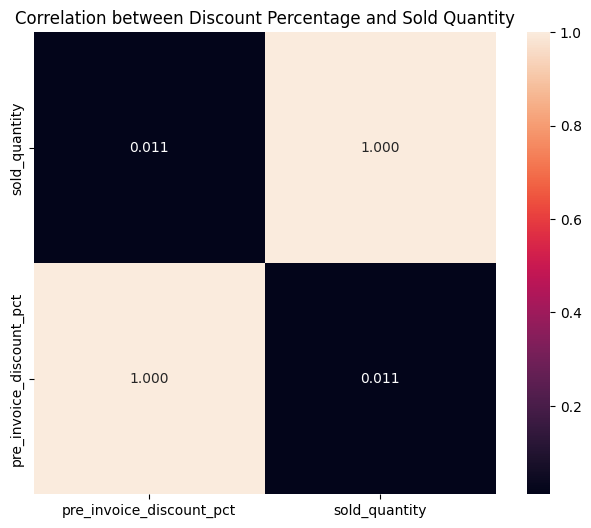

In [ ]:
# Merge dữ liệu chiết khấu với doanh số
discount_sales_data = pd.merge(fact_sales_monthly, fact_pre_invoice_deduction, on=['customer_code', 'fiscal_year'])

# Tính mối tương quan giữa tỷ lệ chiết khấu và doanh số bán hàng
correlation_data = discount_sales_data[['pre_invoice_discount_pct', 'sold_quantity']]

# Tính toán ma trận tương quan
correlation_matrix = correlation_data.corr().sort_values('sold_quantity', ascending=False)


# Visualization of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, fmt='.3f', square = True, annot = True, linecolor ='black')
plt.title('Correlation between Discount Percentage and Sold Quantity')
plt.show()
